In [1]:
%%html
<link rel="stylesheet" type="text/css" href="css/rise.css" />

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('bmh')
plt.rcParams['lines.markeredgecolor'] = 'w'
plt.rcParams['lines.markeredgewidth'] = 0.5
plt.rcParams['figure.figsize'] = [8, 6]

# Principal Component Analysis (PCA)

Generate some random correlated two dimensional data.

In [60]:
# Generate a random cloud of (x, y) points.
np.random.seed(1)
X = np.random.randn(200, 2)

# Apply a random transformation (rotation, scaling) to the points.
transformation = np.random.rand(2, 2)  # 2x2 random transformation matrix
X = X @ transformation  # apply the transformation to the points

X.shape

(200, 2)

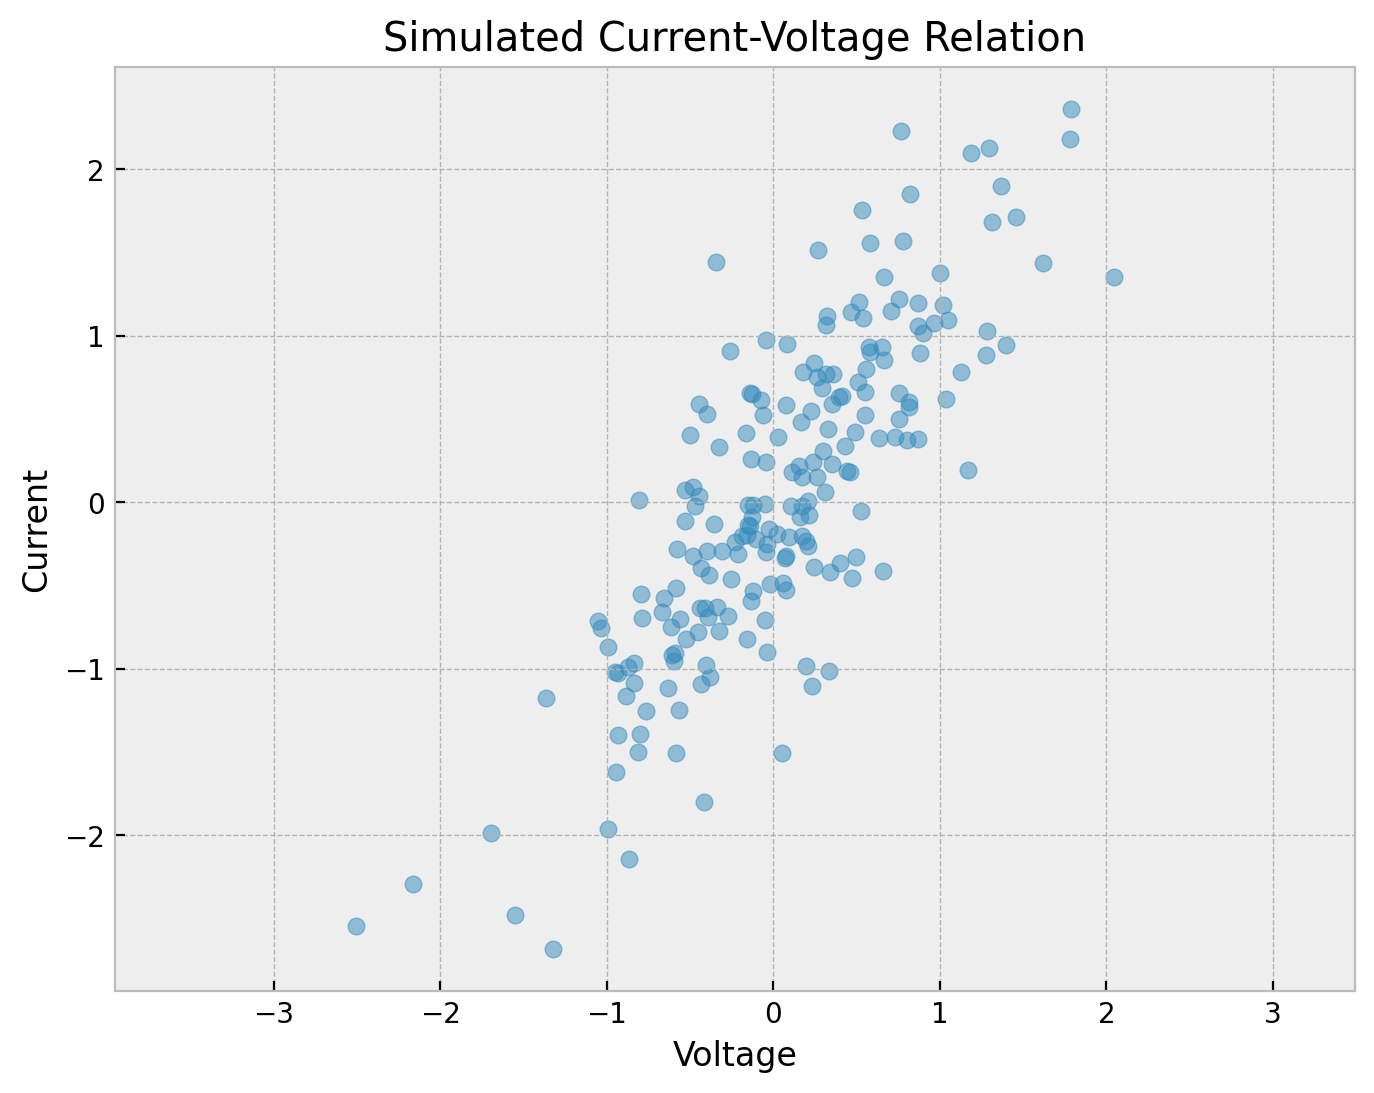

In [61]:
plt.scatter(X[:,0], X[:,1], alpha=0.5)
plt.xlabel('Voltage')
plt.ylabel('Current')
plt.title('Simulated Current-Voltage Relation')
plt.axis('equal');

### Learning goals - *PCA*
|  |  |  |
|--|--|--|
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will visualize the process of changing your perspective to align with the variance in the data.</div> | |
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will visualize the effects of projecting the data onto a smaller number of principal components.</div> | |
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will be able to interpret the principal components as axes in the original data space.</div> | |
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will be able to quantify the amount of variance explained by any given number of principal components.</div> | |

PCA on the two dimensional data above.

In [62]:
from sklearn.decomposition import PCA

model = PCA(n_components=2)
model.fit(X)

PCA(n_components=2)

The principal components are the directions in the data space (2-dimensional in this example) that best explain the variance in the data.

In [63]:
model.components_

array([[-0.56295862, -0.82648508],
       [-0.82648508,  0.56295862]])

In [64]:
# 1st and 2nd principle component axes
pc0 = model.components_[0]
pc1 = model.components_[1]
pc0, pc1

(array([-0.56295862, -0.82648508]), array([-0.82648508,  0.56295862]))

In [65]:
# this function will draw an arrow from point v0 to point v1
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2, color='black', shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

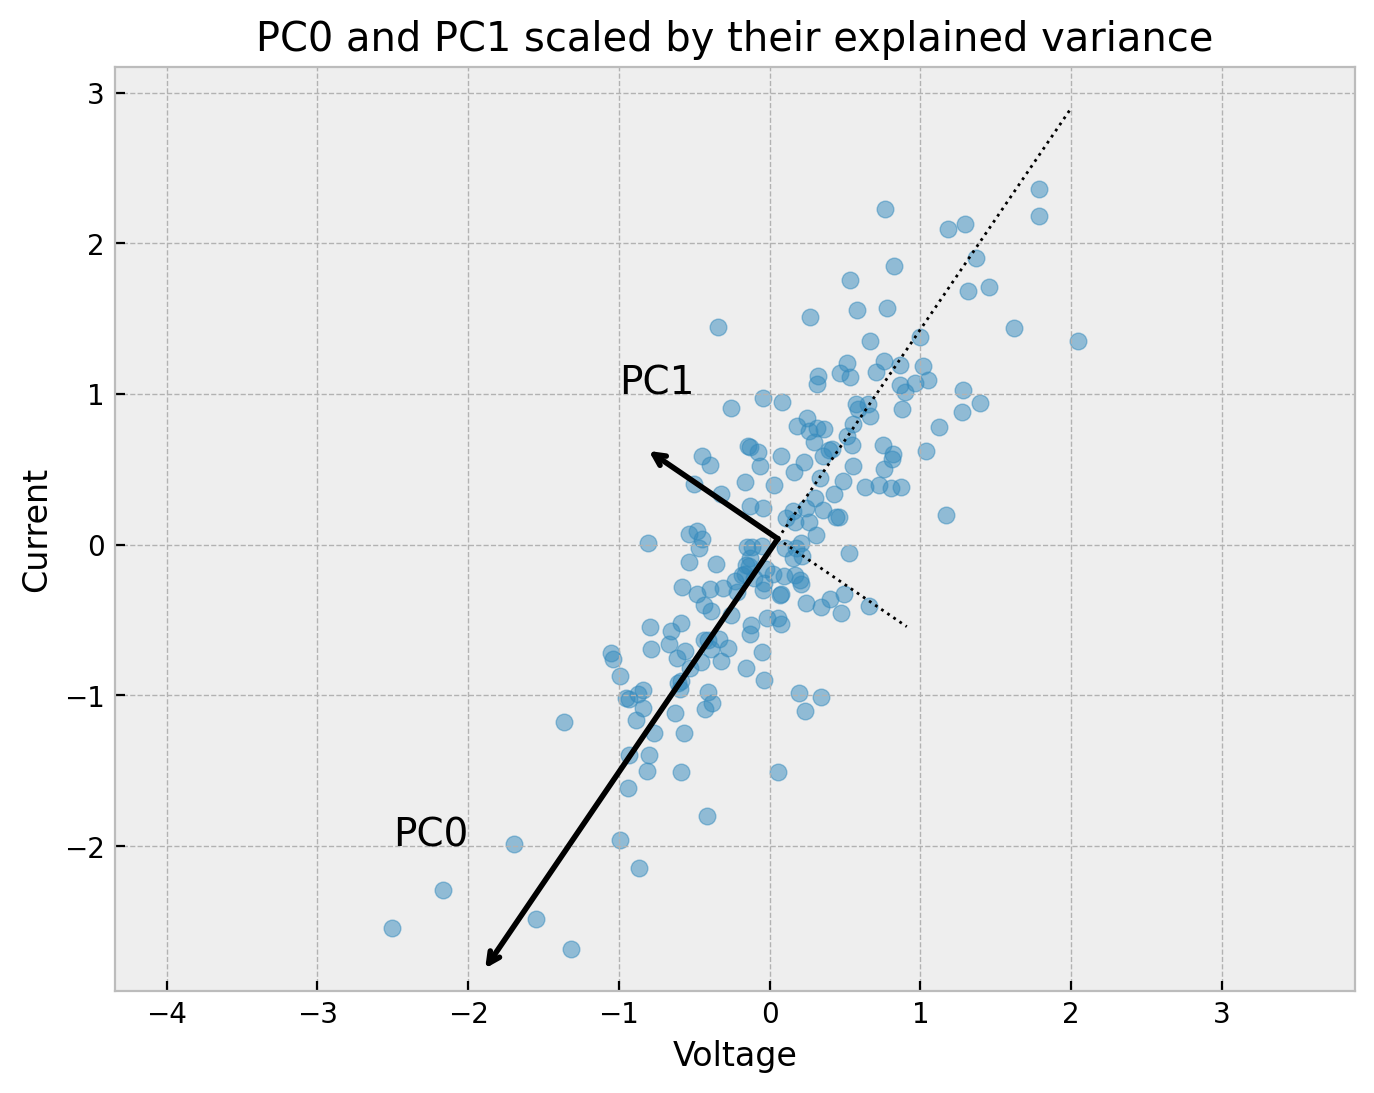

In [66]:
# replot the data points overlaid with arrows showing the principal components
plt.scatter(X[:,0], X[:,1], alpha=0.5)
for length, pcaxis in zip(model.explained_variance_, model.components_):
    v = pcaxis * 3 * np.sqrt(length)
    draw_vector(model.mean_, model.mean_ + v)
    plt.plot(model.mean_[0] - [0, v[0]], model.mean_[1] - [0, v[1]], 'k:', lw=1);
plt.xlabel('Voltage')
plt.ylabel('Current')
plt.title('PC0 and PC1 scaled by their explained variance')
plt.axis('equal')
plt.text(-2.5, -2, 'PC0', fontsize=14)
plt.text(-1, 1, 'PC1', fontsize=14);

Each principal component accounts for some amount of the variance in the data.

In [67]:
# how much variance each of the above vectors accounts for
model.explained_variance_

array([1.32170439, 0.11909325])

The relative amounts of variance accounted for by each principal component in descending order.

In [68]:
# normalized variance explained across all principal components (sum = 1)
model.explained_variance_ratio_

array([0.91734214, 0.08265786])

The principal components are relative to the mean of the data.

In [69]:
model.mean_

array([0.05398738, 0.03917781])

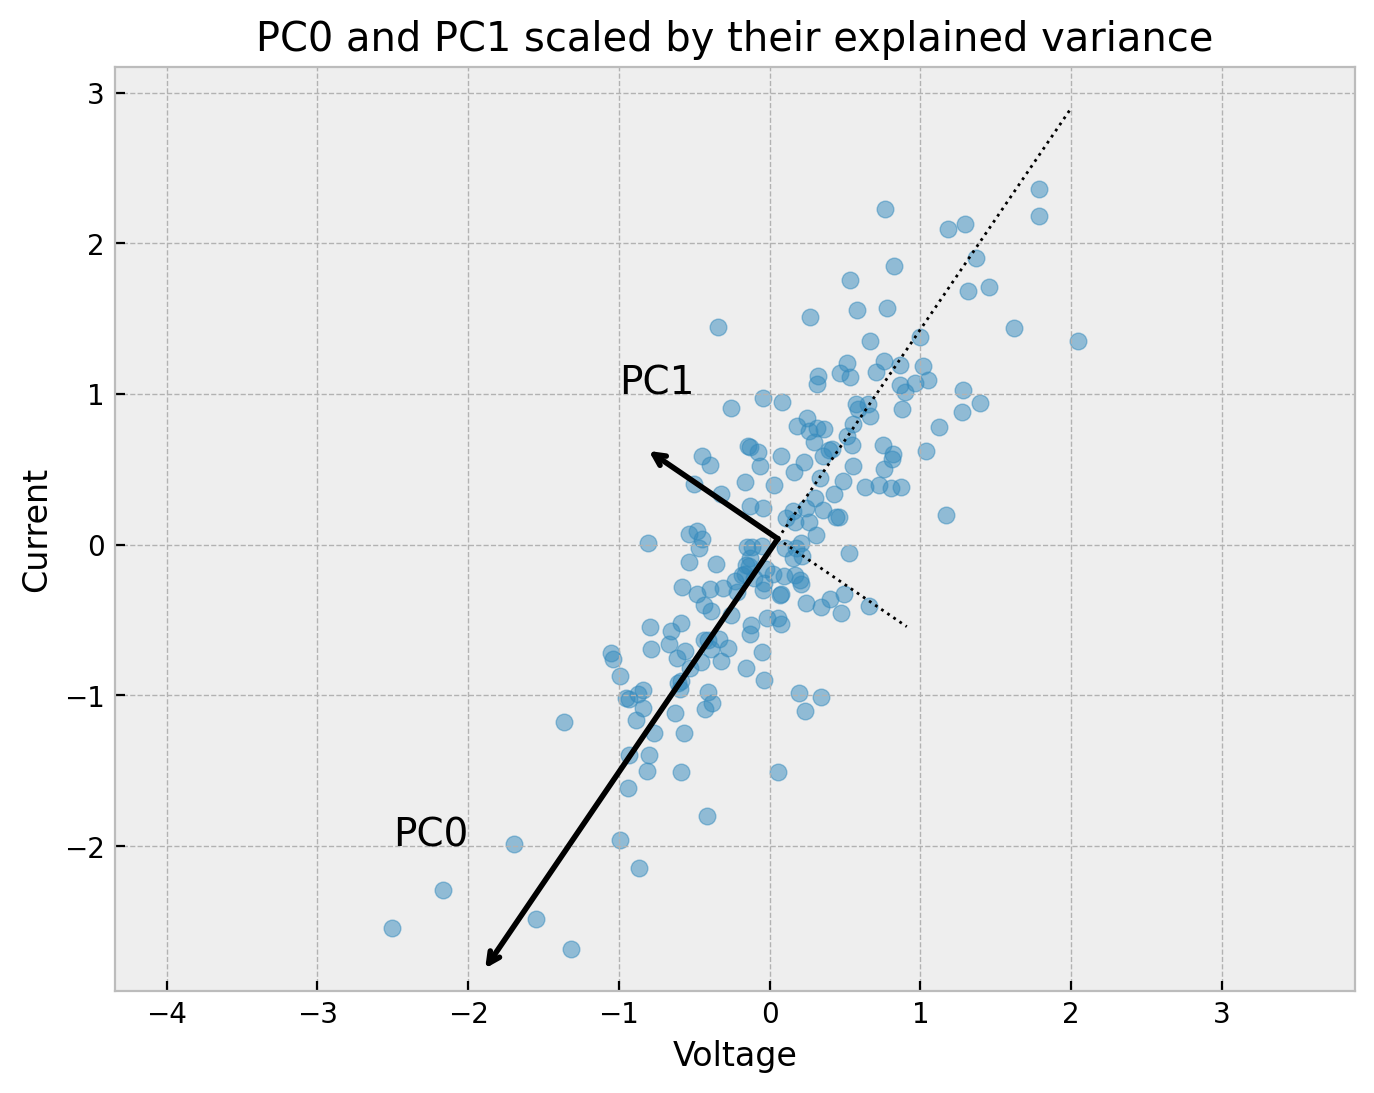

In [70]:
# replot the data points overlaid with arrows showing the principal components
plt.scatter(X[:,0], X[:,1], alpha=0.5)
for length, pcaxis in zip(model.explained_variance_, model.components_):
    v = pcaxis * 3 * np.sqrt(length)
    draw_vector(model.mean_, model.mean_ + v)
    plt.plot(model.mean_[0] - [0, v[0]], model.mean_[1] - [0, v[1]], 'k:', lw=1);
plt.xlabel('Voltage')
plt.ylabel('Current')
plt.title('PC0 and PC1 scaled by their explained variance')
plt.axis('equal')
plt.text(-2.5, -2, 'PC0', fontsize=14)
plt.text(-1, 1, 'PC1', fontsize=14);

If you had to describe each of the above data points with only one value, how would you do it?

Rotate the data so that you look at it from the perspective of the principal component axes PC0 and PC1.

!!! This does NOT change the data, just the perspective from which we view it!

In [71]:
Xrotated = model.transform(X)

X.shape

(200, 2)

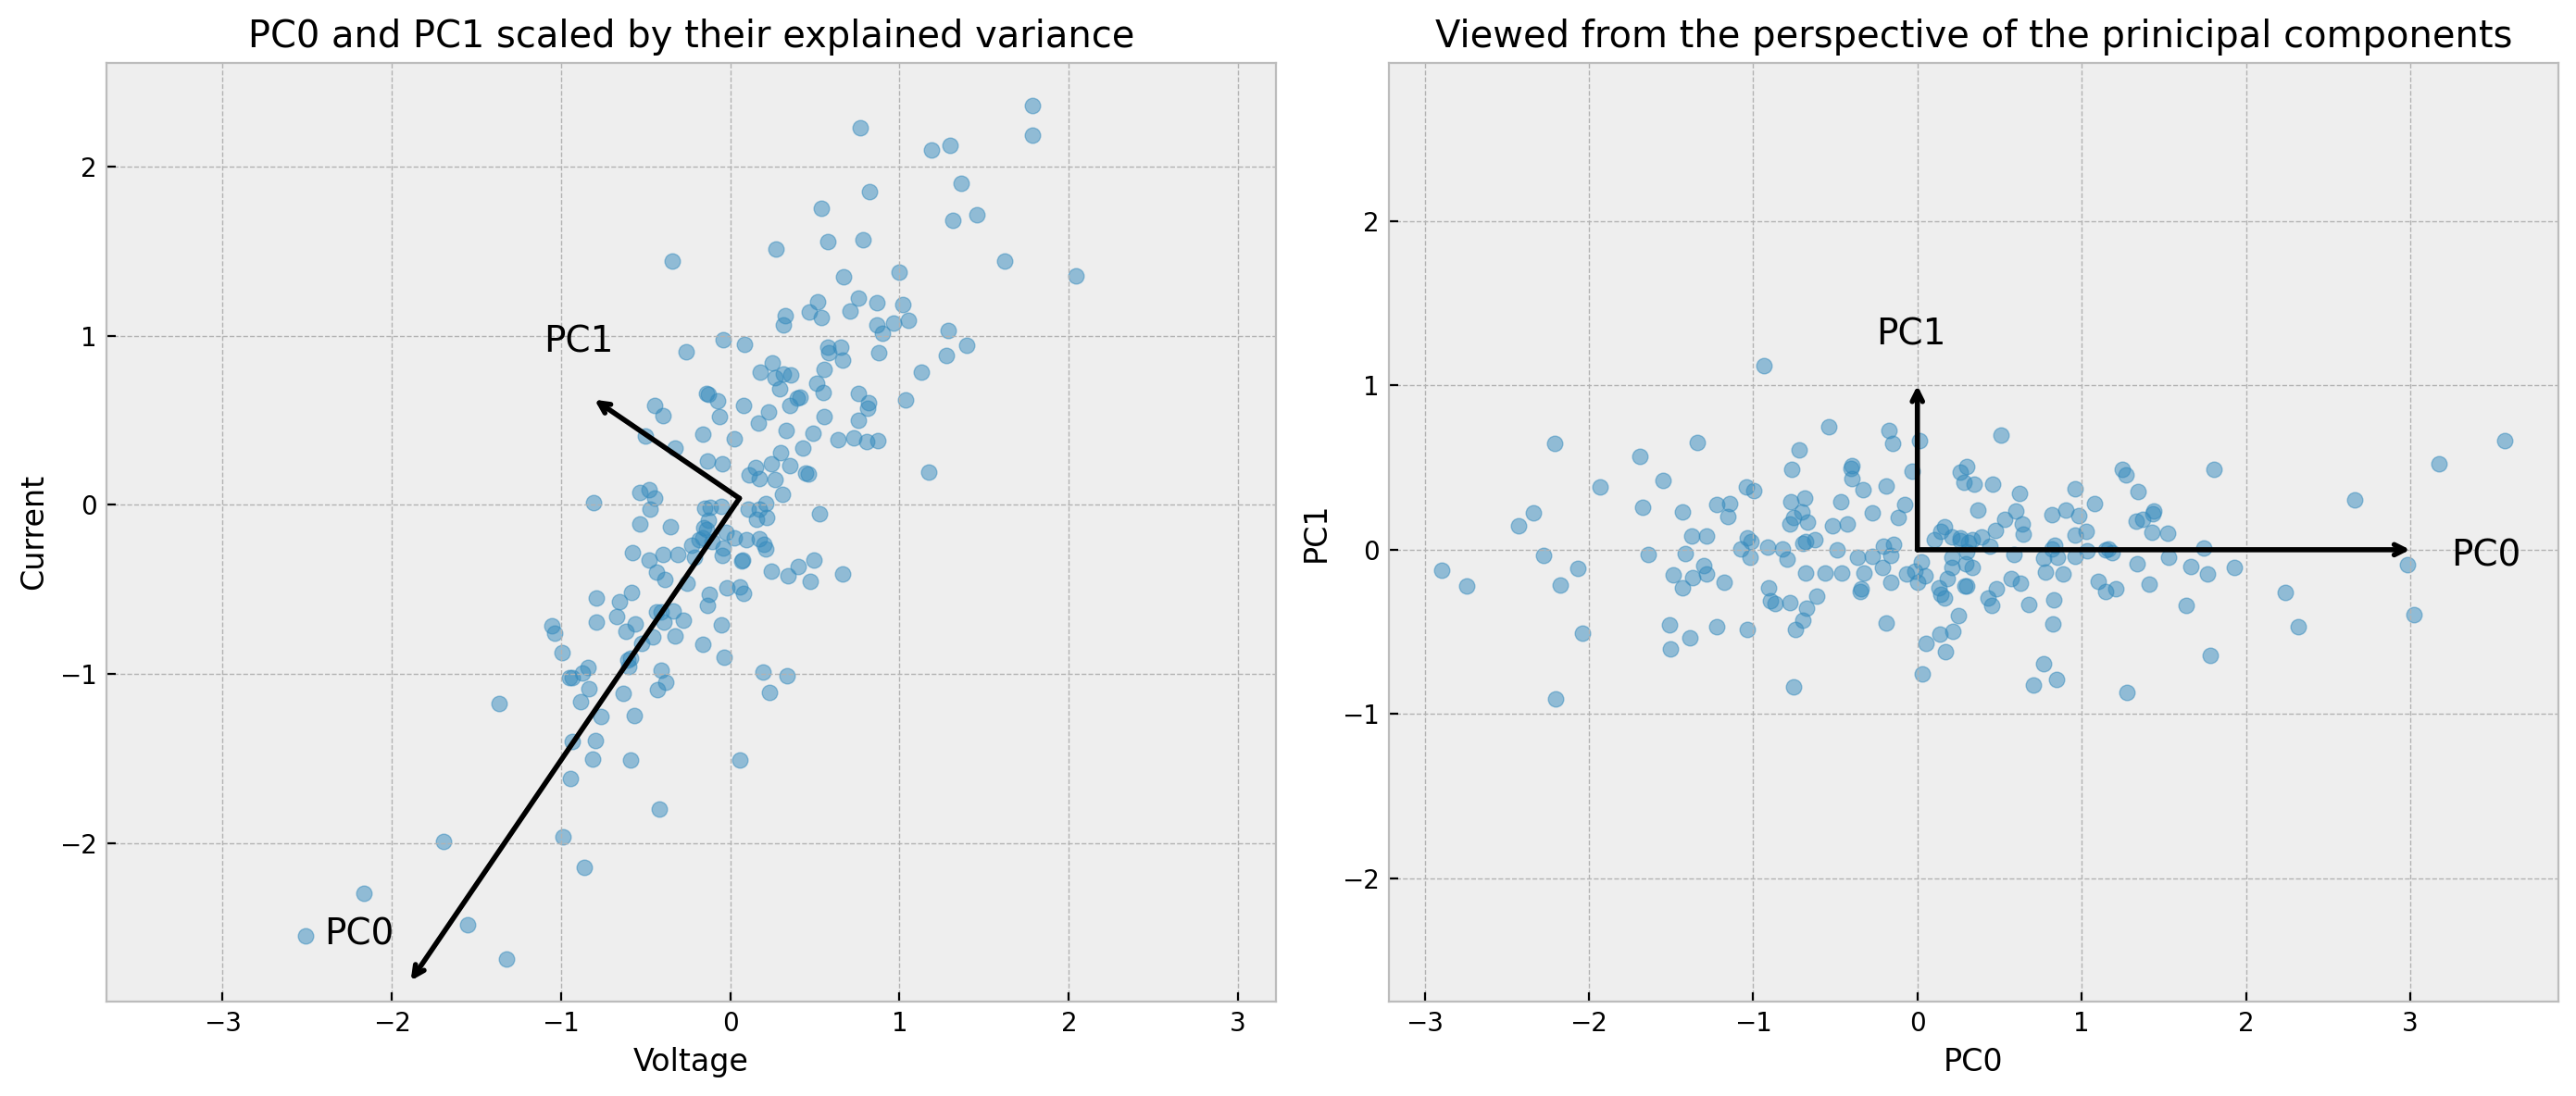

In [72]:
# transform to principal component axes
plt.figure(figsize=[14,6])
plt.subplot(121)
plt.scatter(X[:,0], X[:,1], alpha=0.5)
for length, pcaxis in zip(model.explained_variance_, model.components_):
    v = pcaxis * 3 * np.sqrt(length)
    draw_vector(model.mean_, model.mean_ + v)
plt.xlabel('Voltage')
plt.ylabel('Current')
plt.title('PC0 and PC1 scaled by their explained variance')
plt.axis('equal')
plt.text(-2.4, -2.6, 'PC0', fontsize=14)
plt.text(-1.1, 0.9, 'PC1', fontsize=14)

plt.subplot(122)
plt.scatter(Xrotated[:,0], Xrotated[:,1], alpha=0.5)
draw_vector((0, 0), (3, 0))
draw_vector((0, 0), (0, 1))
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.title('Viewed from the perspective of the prinicipal components')
plt.axis('equal')
plt.text(3.25, -0.1, 'PC0', fontsize=14)
plt.text(-0.25, 1.25, 'PC1', fontsize=14)
plt.tight_layout();

Each principal component is a weighted mixture of the features/dimensions in the original dataset.

    PC0 = -0.56 Voltage - 0.83 Current
    PC1 = -0.83 Voltage - 0.56 Current

### Dimensionality reduction

* Most of the variance in the data is along PC0.
* You can opt to ignore the variance along PC1.
* This amounts to projecting the data onto PC0.
* You lose some information, but it is the smallest component of variation in the data.
* In return, you have compressed the data from two to one dimensional.

In [73]:
# previous model with 2 components
model2 = model

# redo PCA, but specify only a single component
model1 = PCA(n_components=1)
model1.fit(X)

PCA(n_components=1)

In [74]:
model1.components_

array([[-0.56295862, -0.82648508]])

In [75]:
model2.components_

array([[-0.56295862, -0.82648508],
       [-0.82648508,  0.56295862]])

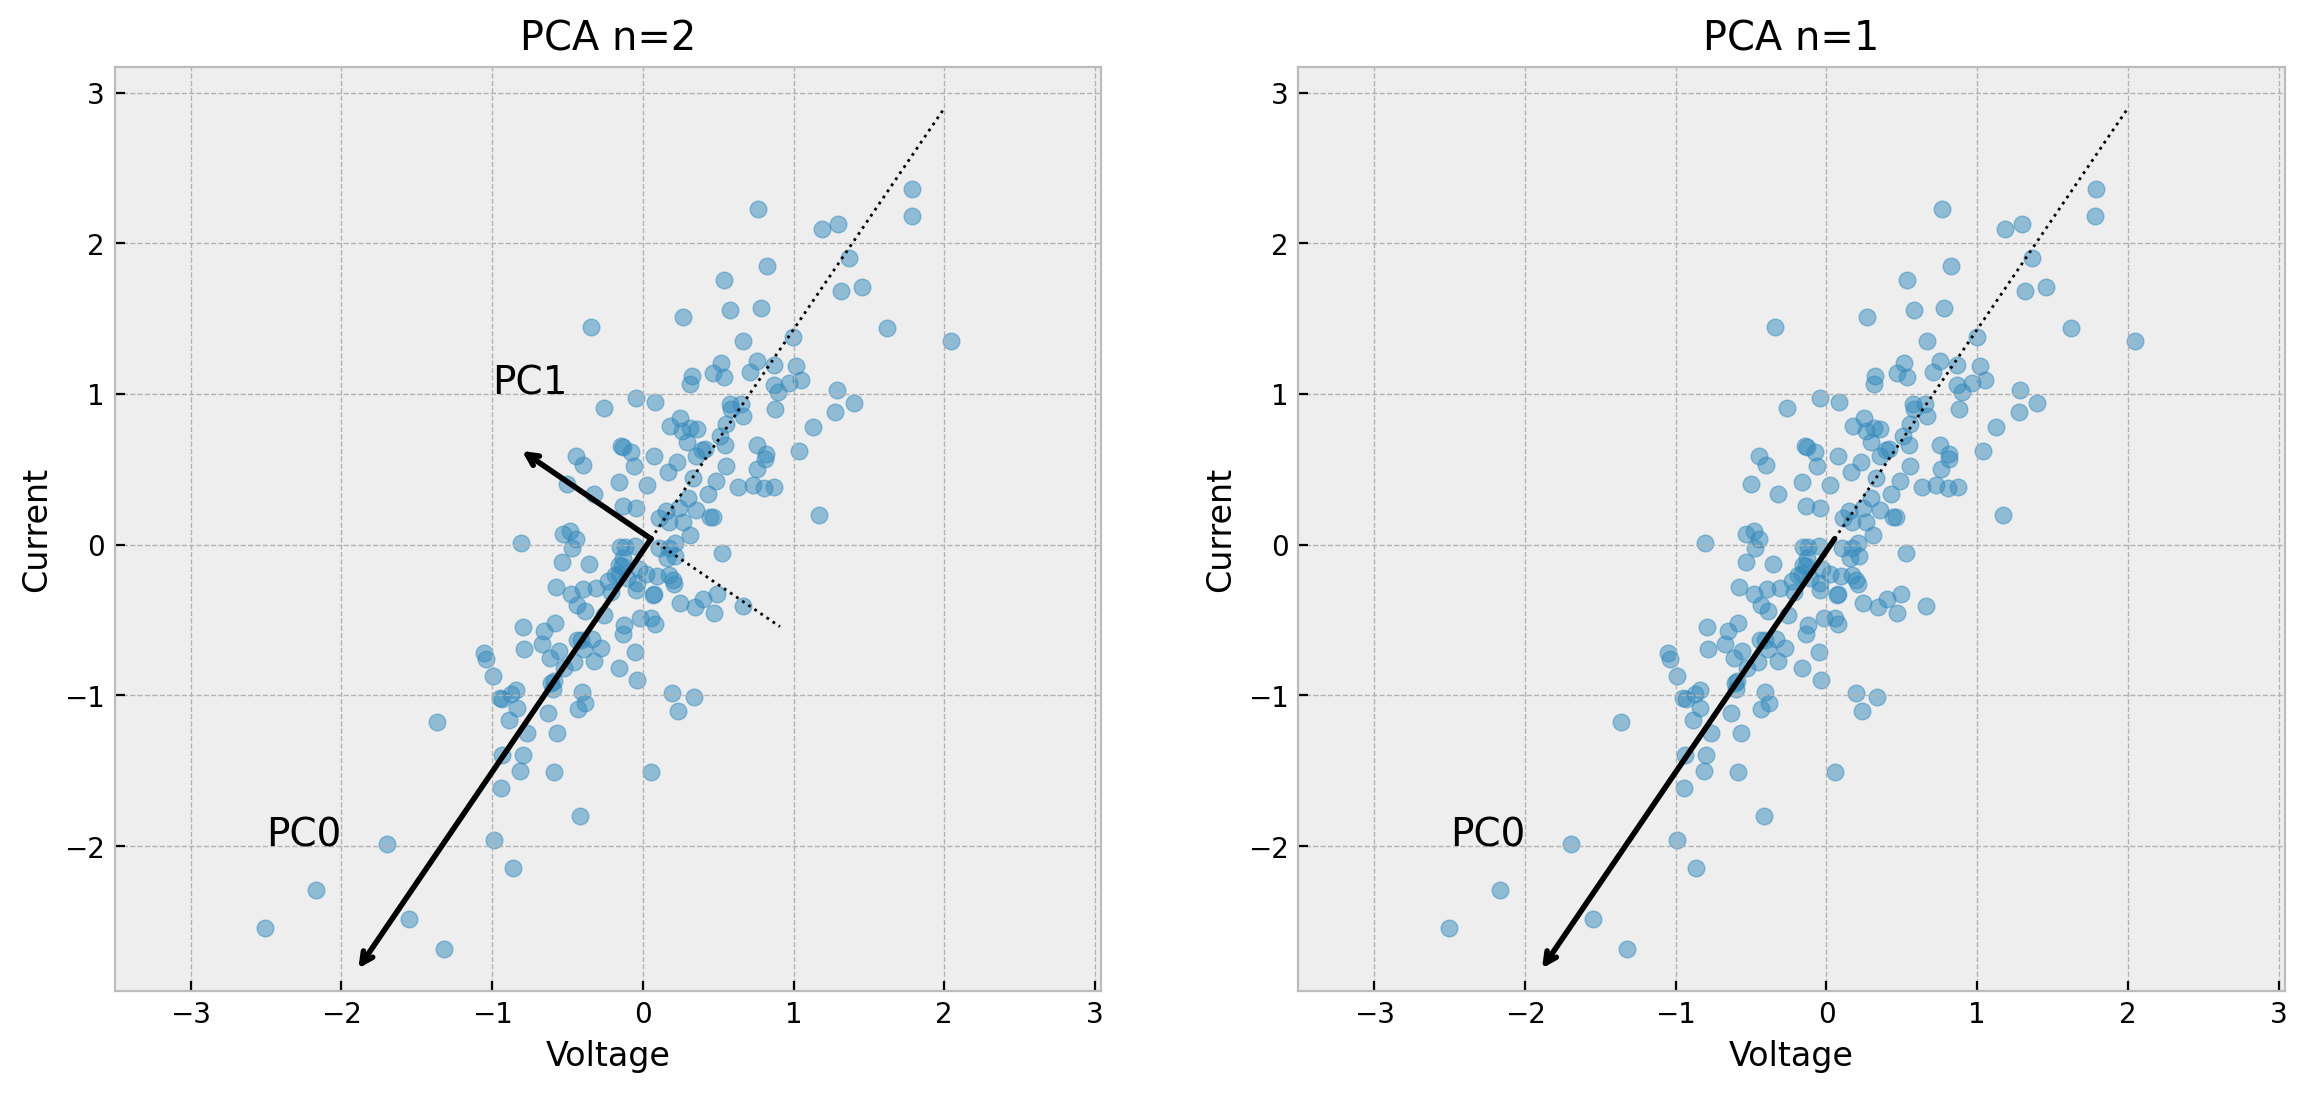

In [76]:
plt.figure(figsize=[14,6])
for i, model in enumerate([model2, model1]):
    plt.subplot(1, 2, i+1)
    plt.scatter(X[:,0], X[:,1], alpha=0.5)
    for length, pcaxis in zip(model.explained_variance_, model.components_):
        v = pcaxis * 3 * np.sqrt(length)
        draw_vector(model.mean_, model.mean_ + v)
        plt.plot(model.mean_[0] - [0, v[0]], model.mean_[1] - [0, v[1]], 'k:', lw=1);
    plt.xlabel('Voltage')
    plt.ylabel('Current')
    plt.title(f'PCA n={model.n_components_}')
    plt.axis('equal')
    plt.text(-2.5, -2, 'PC0', fontsize=14)
    if model.n_components_ == 2:
        plt.text(-1, 1, 'PC1', fontsize=14);

In [77]:
# from PCA with 2 componenets
Xrotated2 = Xrotated

# transform to PCA coordinates
Xrotated1 = model1.transform(X)

# see that we have compressed the data from two to one dimensional
print("        X:", X.shape)
print("Xrotated2:", Xrotated2.shape)
print("Xrotated1:", Xrotated1.shape)

        X: (200, 2)
Xrotated2: (200, 2)
Xrotated1: (200, 1)


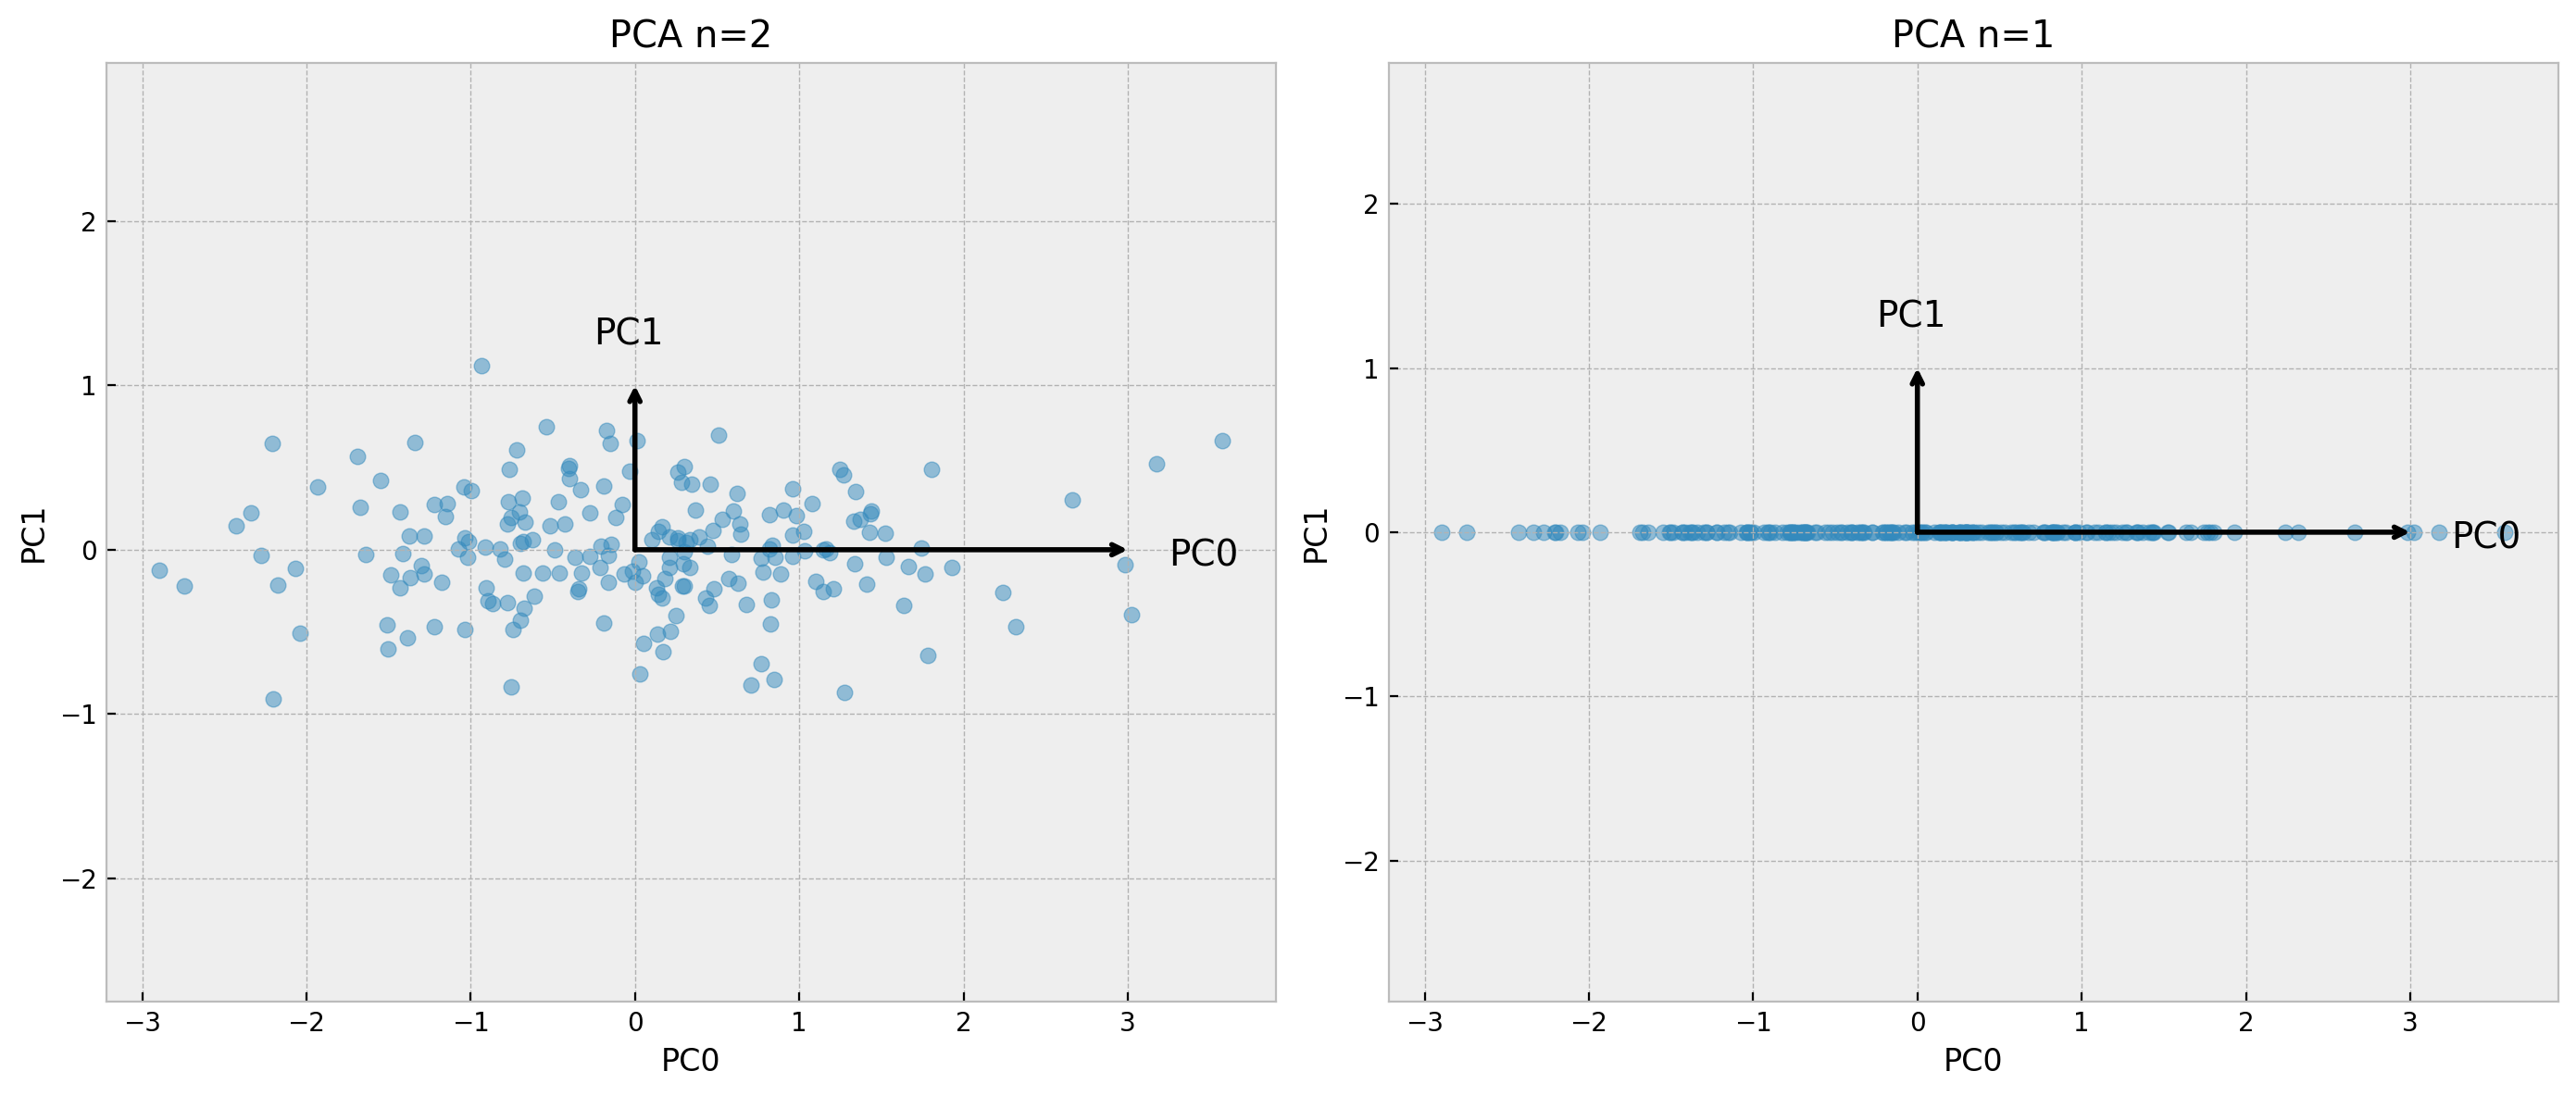

In [78]:
# projecting onto PC0
plt.figure(figsize=[14,6])
ax = plt.subplot(1, 2, 1)
plt.scatter(Xrotated2[:,0], Xrotated2[:,1], alpha=0.5)
draw_vector((0, 0), (3, 0))
draw_vector((0, 0), (0, 1))
plt.axis('equal')
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.title('PCA n=2')
plt.text(3.25, -0.1, 'PC0', fontsize=14)
plt.text(-0.25, 1.25, 'PC1', fontsize=14)
plt.subplot(1, 2, 2)
plt.scatter(Xrotated1[:], np.zeros(Xrotated1.shape), alpha=0.5)
draw_vector((0, 0), (3, 0))
draw_vector((0, 0), (0, 1))
plt.axis('equal')
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.title('PCA n=1')
plt.text(3.25, -0.1, 'PC0', fontsize=14)
plt.text(-0.25, 1.25, 'PC1', fontsize=14)
plt.tight_layout();

Rotate back from the principal component axes perspective to the original data axes perspective.

In [79]:
# go back from PCA coordinates to our data's original coordinates
Xprojected1 = model1.inverse_transform(Xrotated1)

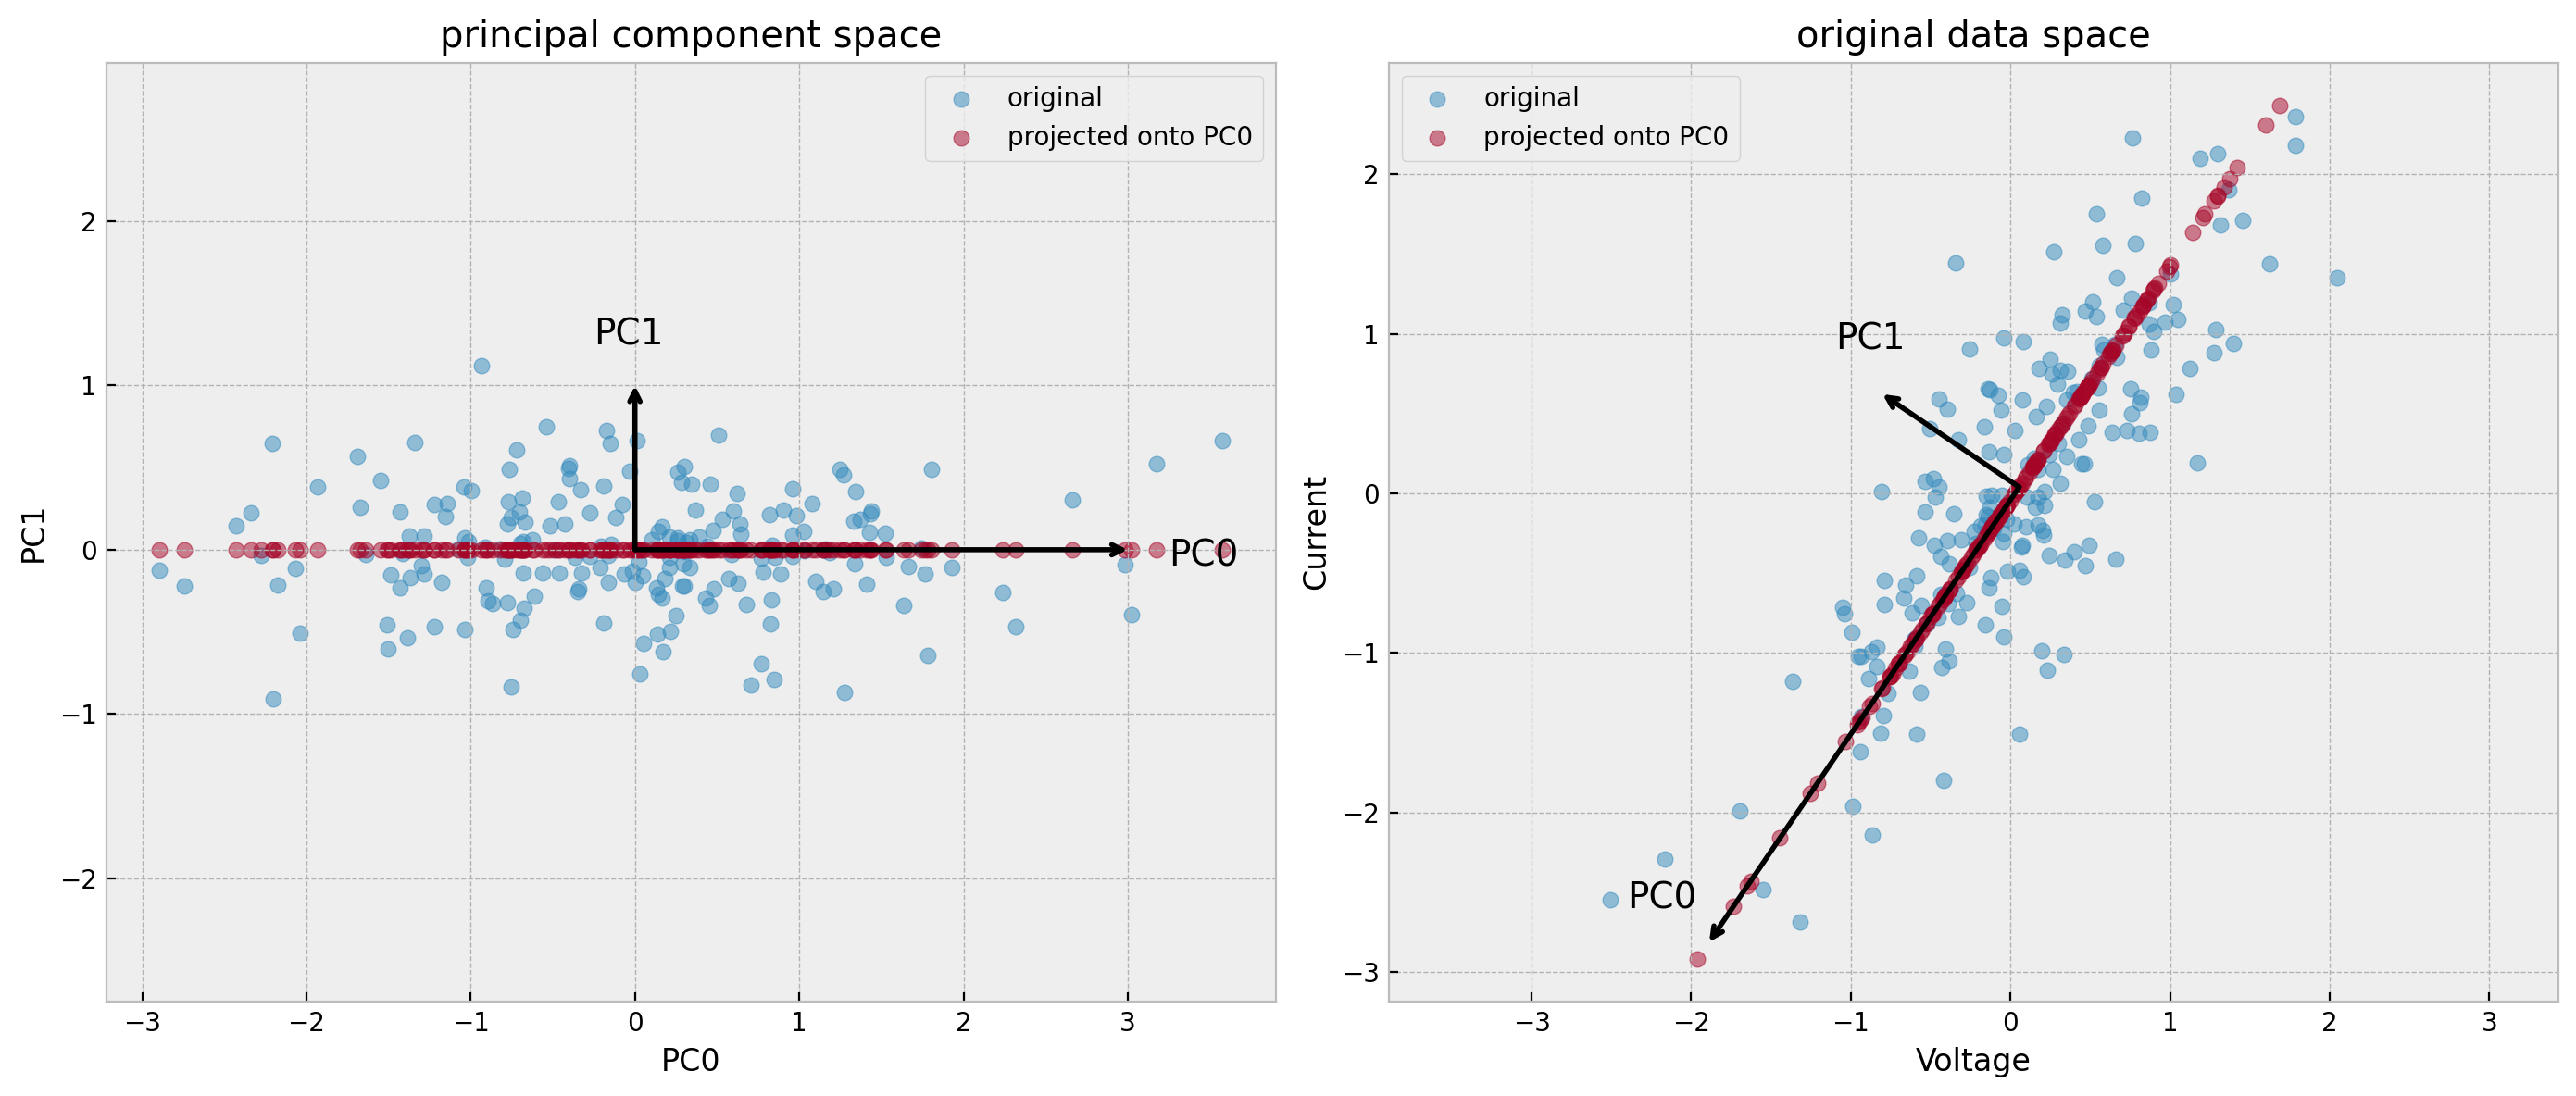

In [80]:
# original data overlaid with PCA compressed data
plt.figure(figsize=[14,6])
ax = plt.subplot(1, 2, 1)
plt.scatter(Xrotated2[:,0], Xrotated2[:,1], alpha=0.5, label='original')
plt.scatter(Xrotated1[:], np.zeros(Xrotated1.shape), alpha=0.5, label='projected onto PC0')
draw_vector((0, 0), (3, 0))
draw_vector((0, 0), (0, 1))
plt.axis('equal')
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.title('principal component space')
plt.text(3.25, -0.1, 'PC0', fontsize=14)
plt.text(-0.25, 1.25, 'PC1', fontsize=14)
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.scatter(X[:,0], X[:,1], alpha=0.5, label='original')
plt.scatter(Xprojected1[:,0], Xprojected1[:,1], 
            alpha=0.5, label='projected onto PC0')
for length, pcaxis in zip(model2.explained_variance_, model2.components_):
    v = pcaxis * 3 * np.sqrt(length)
    draw_vector(model2.mean_, model2.mean_ + v)
plt.axis('equal')
plt.xlabel('Voltage')
plt.ylabel('Current')
plt.title('original data space')
plt.text(-2.4, -2.6, 'PC0', fontsize=14)
plt.text(-1.1, 0.9, 'PC1', fontsize=14)
plt.legend(loc='best')
plt.tight_layout();

What are PC0 and PC1?

    PC0 = -0.56 Voltage - 0.83 Current
    PC1 = -0.83 Voltage - 0.56 Current

* They're rotated orthogonal axes in the original Current vs. Voltage space.
* PC0 and PC1 are each different mixtures of Current and Voltage.
* Each principal component is therefore a different mixture of your original data axes.

!!! PCA cares about variance in the data.

* If the units of the different dimensions are different and their scales are widely different, then PCA will tend to maximize the contribution of the dimension with the largest units.
* To keep this from happening, you should in such cases first standardize the data in each dimension, then perform PCA on the standardized data. This way, the variance in each dimension will be treated equally.

How many principal components should you choose?

* Often 2 or 3 are chosen simply to make it easier to visualize the data.
* Otherwise, you can look to see at what point adding more PCs does not do much better at explaining the variation in the data.

In [81]:
# PCA with maximum number of components you want to consider
model = PCA(n_components=2)
model.fit(X)
model.explained_variance_ratio_

array([0.91734214, 0.08265786])

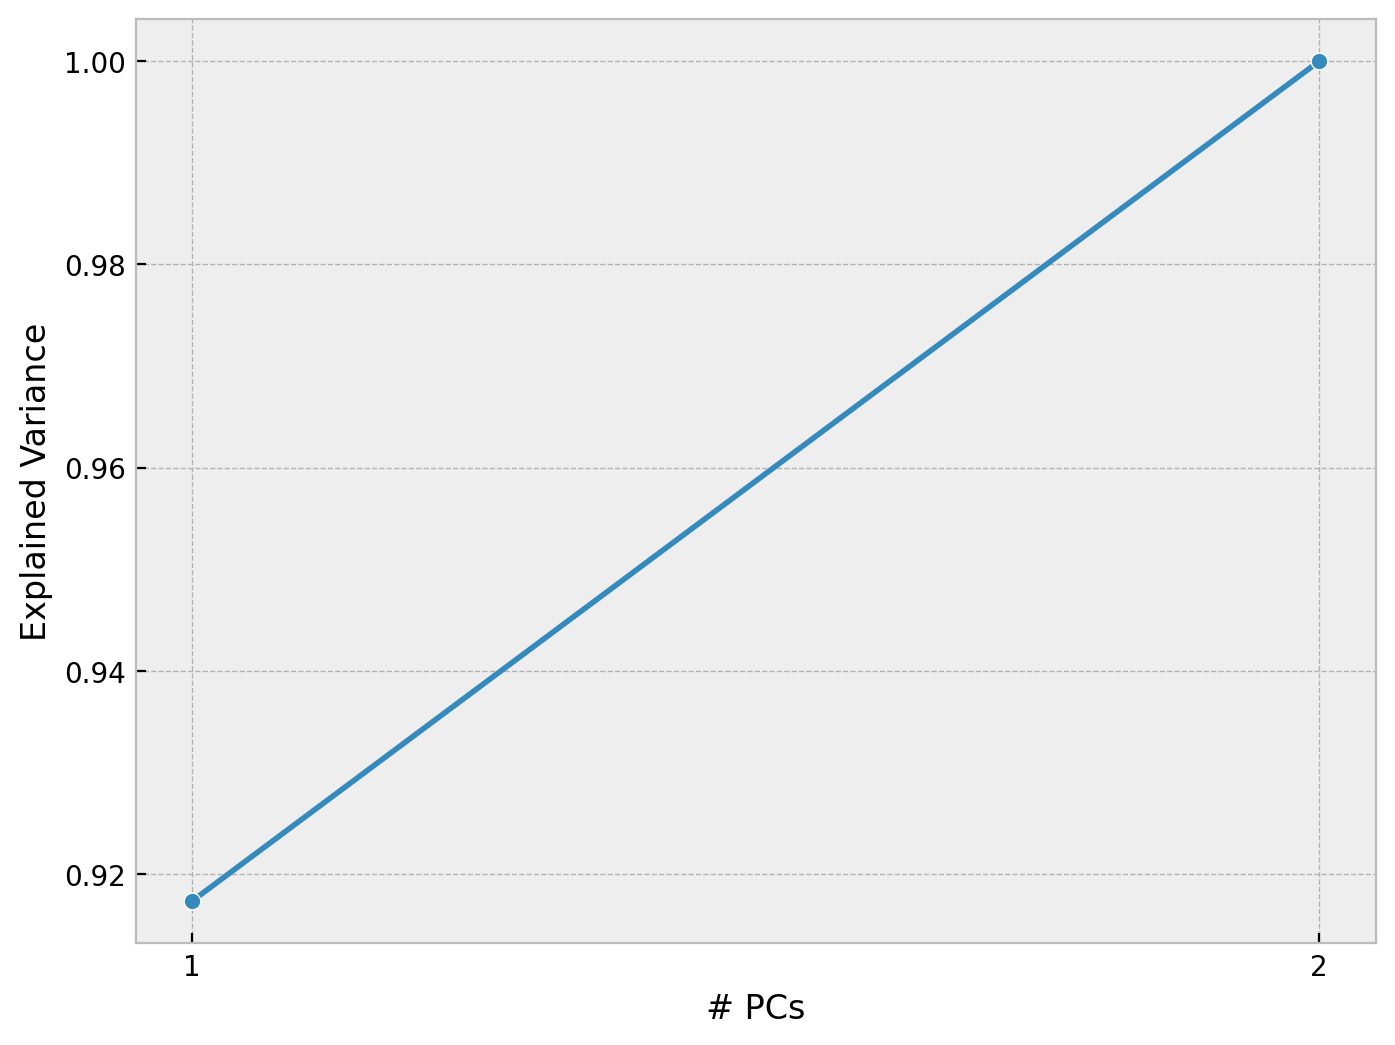

In [82]:
numPC = np.arange(1, 3)
plt.plot(numPC, np.cumsum(model.explained_variance_ratio_), 'o-')
plt.xticks(numPC)
plt.xlabel('# PCs')
plt.ylabel('Explained Variance');

### A higher dimensional example.

Expression levels of 77 proteins measured in the cerebral cortex of 8 classes of control and Down syndrome (Ts65Dn) mice exposed to context fear conditioning.

https://www.kaggle.com/ruslankl/mice-protein-expression

In [83]:
import pandas as pd
df = pd.read_csv('data/Data_Cortex_Nuclear.csv')
df = df.dropna()  # quick and dirty although not the best way to do this
df

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
75     3415_1  0.649781  0.828696  0.405862  2.921435  5.167979  0.207174   
76     3415_2  0.616481  0.841974  0.388584  2.862575  5.194163  0.223433   
77     3415_3  0.637424  0.852882  0.400561  2.968155  5.350820  0.208790   
78     3415_4  0.576815  0.755390  0.348346  2.624901  4.727509  0.205892   
79     3415_5  0.542545  0.757917  0.350051  2.634509  4.735602  0.210526   
...       ...       ...       ...       ...       ...       ...       ...   
1045  3525_11  0.382149  0.595792  0.399101  2.527574  4.629493  0.317810   
1046  3525_12  0.387947  0.586510  0.431650  2.527041  4.781082  0.316903   
1047  3525_13  0.343695  0.562547  0.361243  2.412885  3.949361  0.330158   
1048  3525_14  0.346594  0.551467  0.390353  2.445052  4.236201  0.343610   
1049  3525_15  0.365907  0.552861  0.386275  2.473812  4.347236  0.353783   

       pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
75    0.176640   3.728084  0.239283  ...  0.129363  0.486912   0.125152   
76    0.167725   3.648240  0.221030  ...  0.143084  0.467833   0.112857   
77    0.173261   3.814545  0.222300  ...  0.147673  0.462501   0.116433   
78    0.161192   3.778530  0.194153  ...  0.121290  0.479110   0.102831   
79    0.165671   3.871971  0.194297  ...  0.142617  0.438354   0.110614   
...        ...        ...       ...  ...       ...       ...        ...   
1045  0.213235   6.219567  0.232639  ...  0.122308  0.507017   0.172393   
1046  0.222111   6.307723  0.239074  ...  0.121216  0.492432   0.177319   
1047  0.225620   6.060165  0.254951  ...  0.121936  0.490258   0.169076   
1048  0.229239   6.023371  0.240676  ...  0.136900  0.502282   0.180016   
1049  0.232784   6.085354  0.242726  ...  0.130069  0.487991   0.194635   

        EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
75    0.146865  0.143517  1.627181   Control  Memantine       C/S  c-CS-m  
76    0.161132  0.145719  1.562096   Control  Memantine       C/S  c-CS-m  
77    0.160594  0.142879  1.571868   Control  Memantine       C/S  c-CS-m  
78    0.144238  0.141681  1.646608   Control  Memantine       C/S  c-CS-m  
79    0.155667  0.146408  1.607631   Control  Memantine       C/S  c-CS-m  
...        ...       ...       ...       ...        ...       ...     ...  
1045  0.200097  0.221994  1.141423    Ts65Dn     Saline       S/C  t-SC-s  
1046  0.207593  0.235223  1.104757    Ts65Dn     Saline       S/C  t-SC-s  
1047  0.182590  0.243715  1.104494    Ts65Dn     Saline       S/C  t-SC-s  
1048  0.199685  0.269866  1.136585    Ts65Dn     Saline       S/C  t-SC-s  
1049  0.220056  0.242514  1.085621    Ts65Dn     Saline       S/C  t-SC-s  

[552 rows x 82 columns]

In [84]:
X = df.loc[:,'DYRK1A_N':'CaNA_N']  # just protein expression levels for all mice
X.shape

(552, 77)

Each of 552 mice/samples is a data point in a 77-dimensional space (one dimension for each protein whose expression level was measured).

* Each mouse data point is 77 dimensional (one dimension for each protein with the value in that dimension being that proteins expression level).
* If it were possible to visualize 77 dimensions, you could plot each mouse as a point on a graph with 77 axes (one for each protein).

# Exercise

Perform PCA on the cortical protein expression level dataset using 20 components, and plot the cummulative variance explained by each component.

How many principal componenets do you need to explain ~90% of the variance in the data?

In [ ]:
X = df.loc[:,'DYRK1A_N':'CaNA_N']

...

plt.xlabel('# PCs')
plt.ylabel('Explained Variance');

# Exercise Key

Perform PCA on the cortical protein expression level dataset using 20 components, and plot the cummulative variance explained by each component.

How many principal componenets do you need to explain ~90% of the variance in the data?

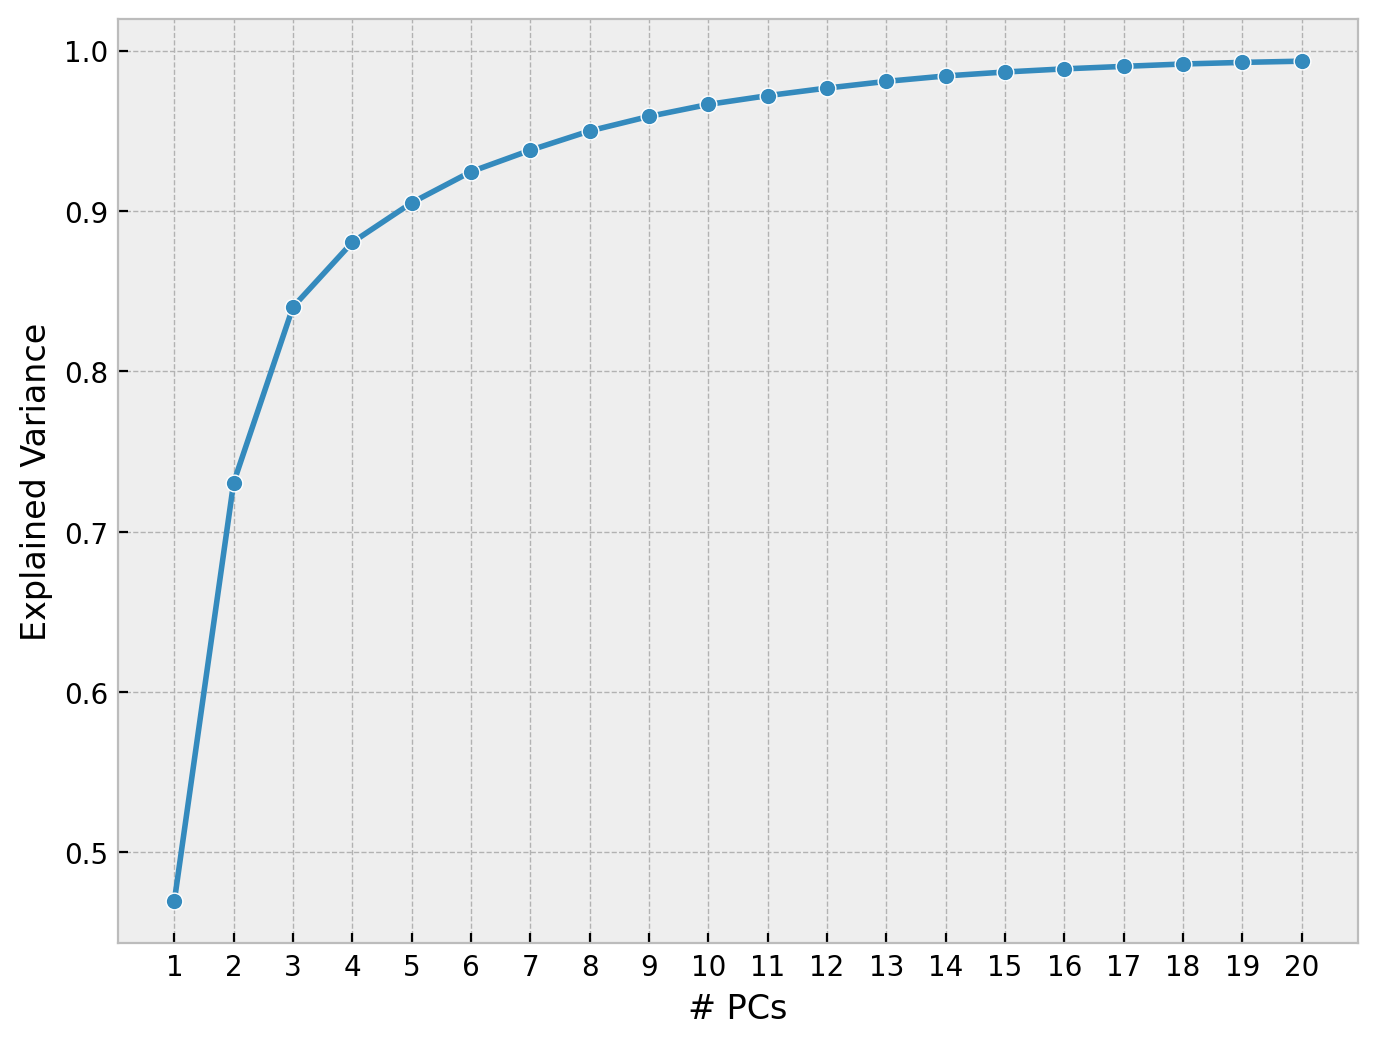

In [85]:
X = df.loc[:,'DYRK1A_N':'CaNA_N']

model = PCA(n_components=20)
model.fit(X)

n = np.arange(1, 21)
plt.plot(n, np.cumsum(model.explained_variance_ratio_), 'o-')
plt.xticks(n)
plt.xlabel('# PCs')
plt.ylabel('Explained Variance');

Let's use PCA to compress the mouse coritcal protein expression data by using only 6 values (6 dimensions) to explain each mouse's expression profile. This will explain ~90% of the variance in the data.

In [86]:
X = df.loc[:,'DYRK1A_N':'CaNA_N']

model = PCA(n_components=6)
model.fit(X)

Xpc = model.transform(X)

print('  X: ', X.shape)
print('Xpc: ', Xpc.shape)

  X:  (552, 77)
Xpc:  (552, 6)


Did you throw away all information about 71 of the 77 proteins?

!!! NO. You did NOT completely throw away 71 of the original features!!!

* You rotated your perspective and then compressed the data along 6 of the axes from our rotated point of view.
* After compressing if you rotate back to the original feature space (point of view), then each mouse will be a point in our original 77-dimensional space.
* However, the data points will NOT be exactly what they were before compression. Some of the variance in the data will have been lost by projecting the data onto only 6 PCs.
* But each data point will still carry information about all 77 of the original dimensions (features/proteins) as each of the 6 principal components you used to describe the data is itself a weighted mixture of all 77 original feature dimensions.

In [87]:
Xprojected = model.inverse_transform(Xpc)

print('         X: ', X.shape)
print('       Xpc: ', Xpc.shape)
print('Xprojected: ', Xprojected.shape)

         X:  (552, 77)
       Xpc:  (552, 6)
Xprojected:  (552, 77)


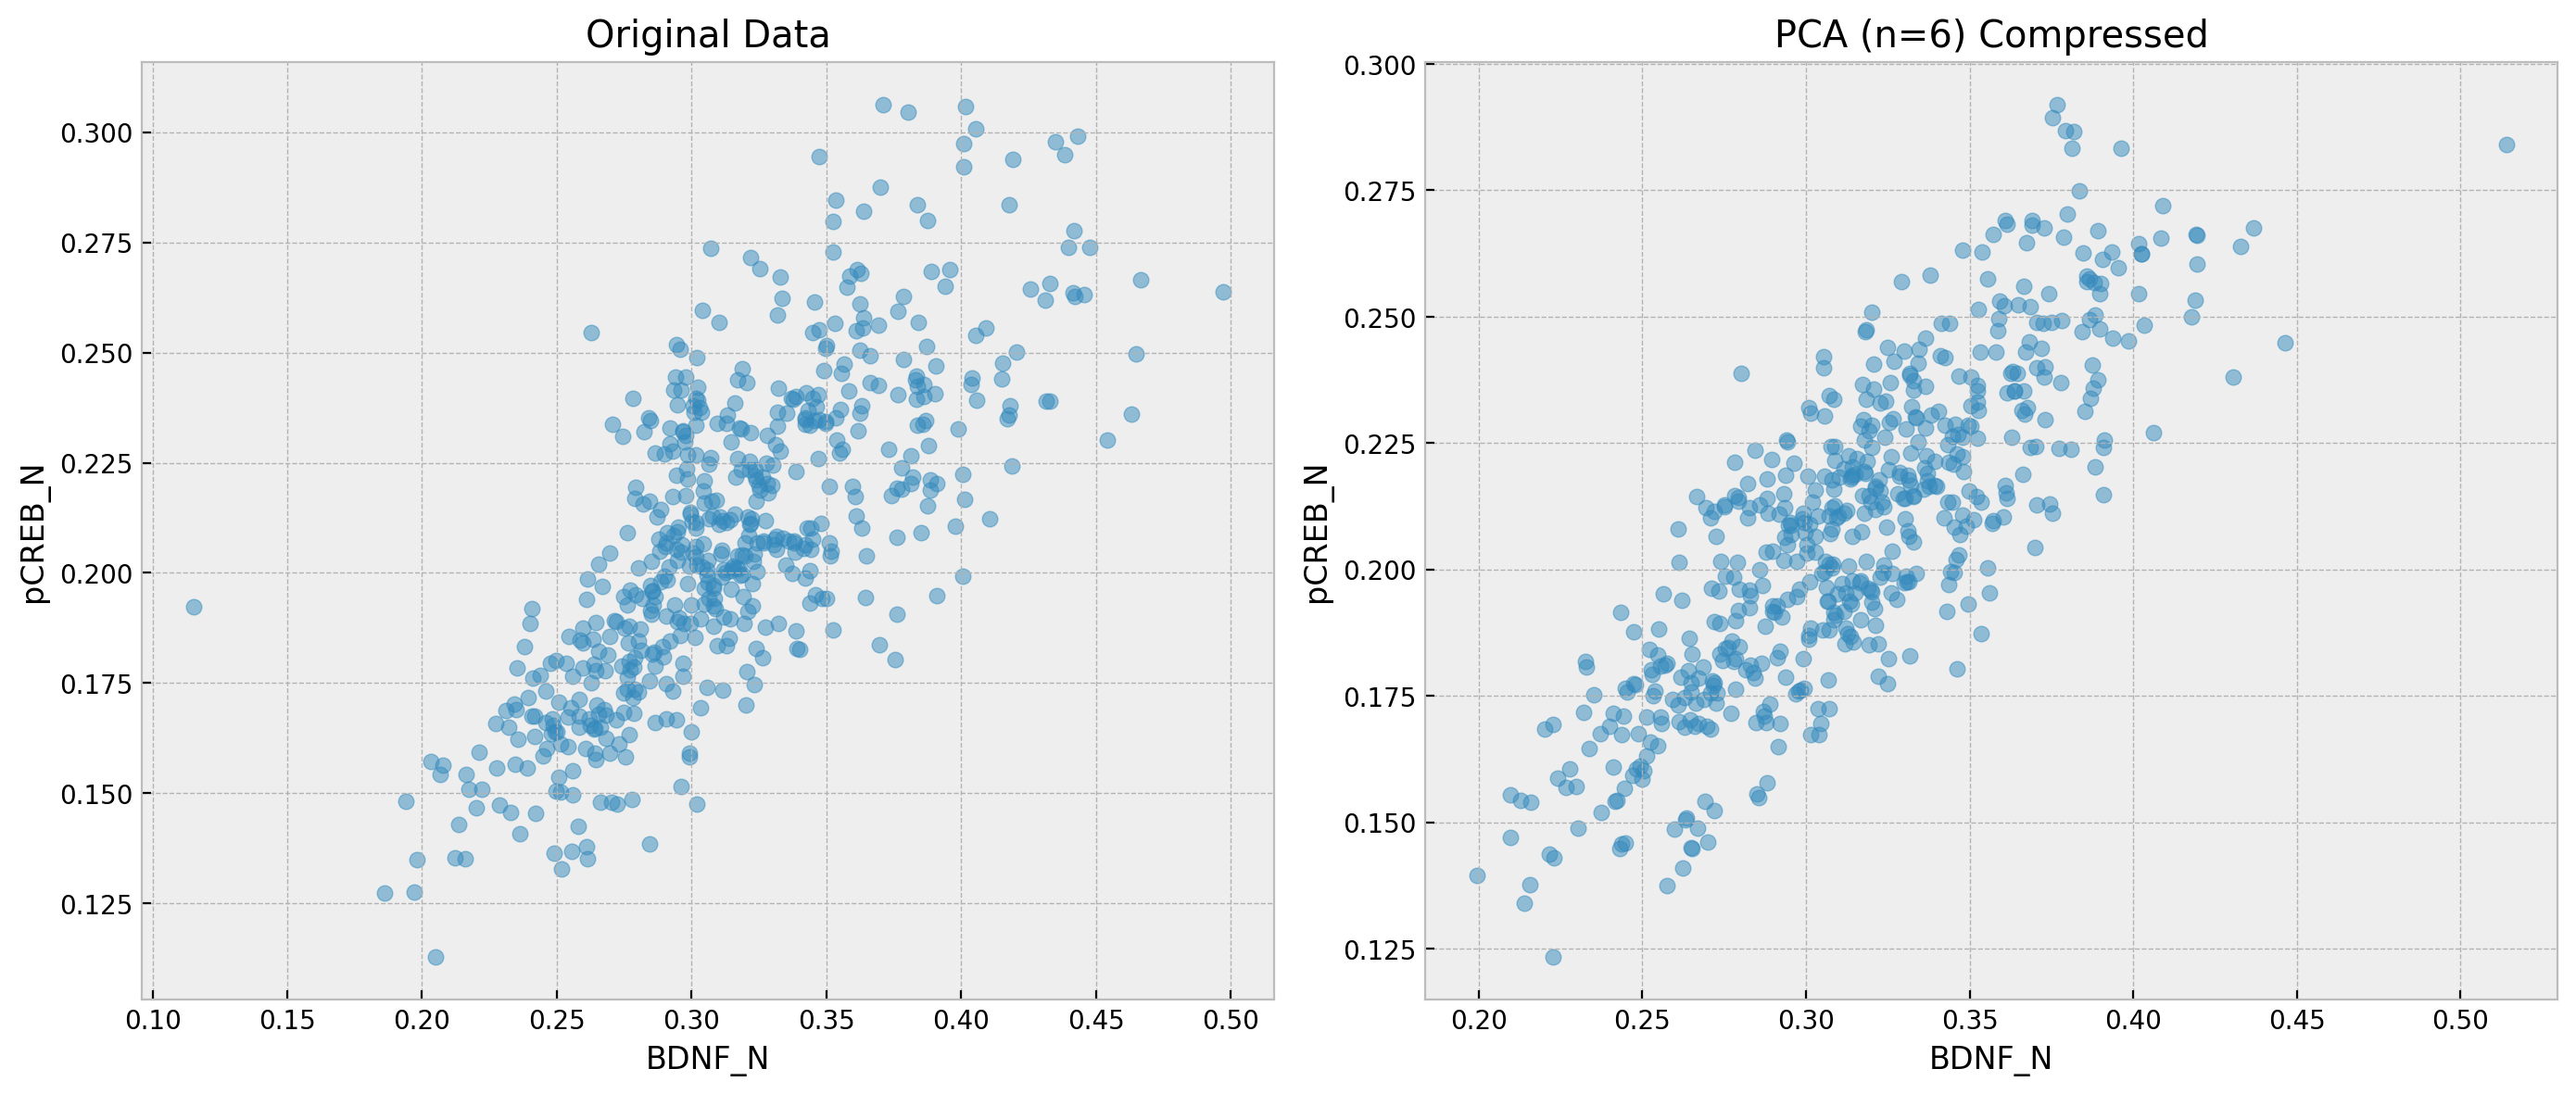

In [88]:
i = 2
j = 8
plt.figure(figsize=[14,6])
plt.subplot(1, 2, 1)
plt.scatter(X.iloc[:,i], X.iloc[:,j], alpha=0.5)
plt.xlabel(X.columns[i])
plt.ylabel(X.columns[j])
plt.title('Original Data');
plt.subplot(1, 2, 2)
plt.scatter(Xprojected[:,i], Xprojected[:,j], alpha=0.5)
plt.xlabel(X.columns[i])
plt.ylabel(X.columns[j])
plt.title('PCA (n=6) Compressed');
plt.tight_layout();

So what are the PCs?

* They are the rotated coordinate axes (well, 6 of the 77 as we ignored all variance along 71 of them).
* The rotated axes are each mixtures of the original 77 features axes.
* So each PC is a mixture of the original 77 features. Thus, we haven't completely forgotten all about 71 of the features.

In [89]:
model.components_.shape

(6, 77)

In [90]:
pc0 = model.components_[0]
pc0.shape

(77,)

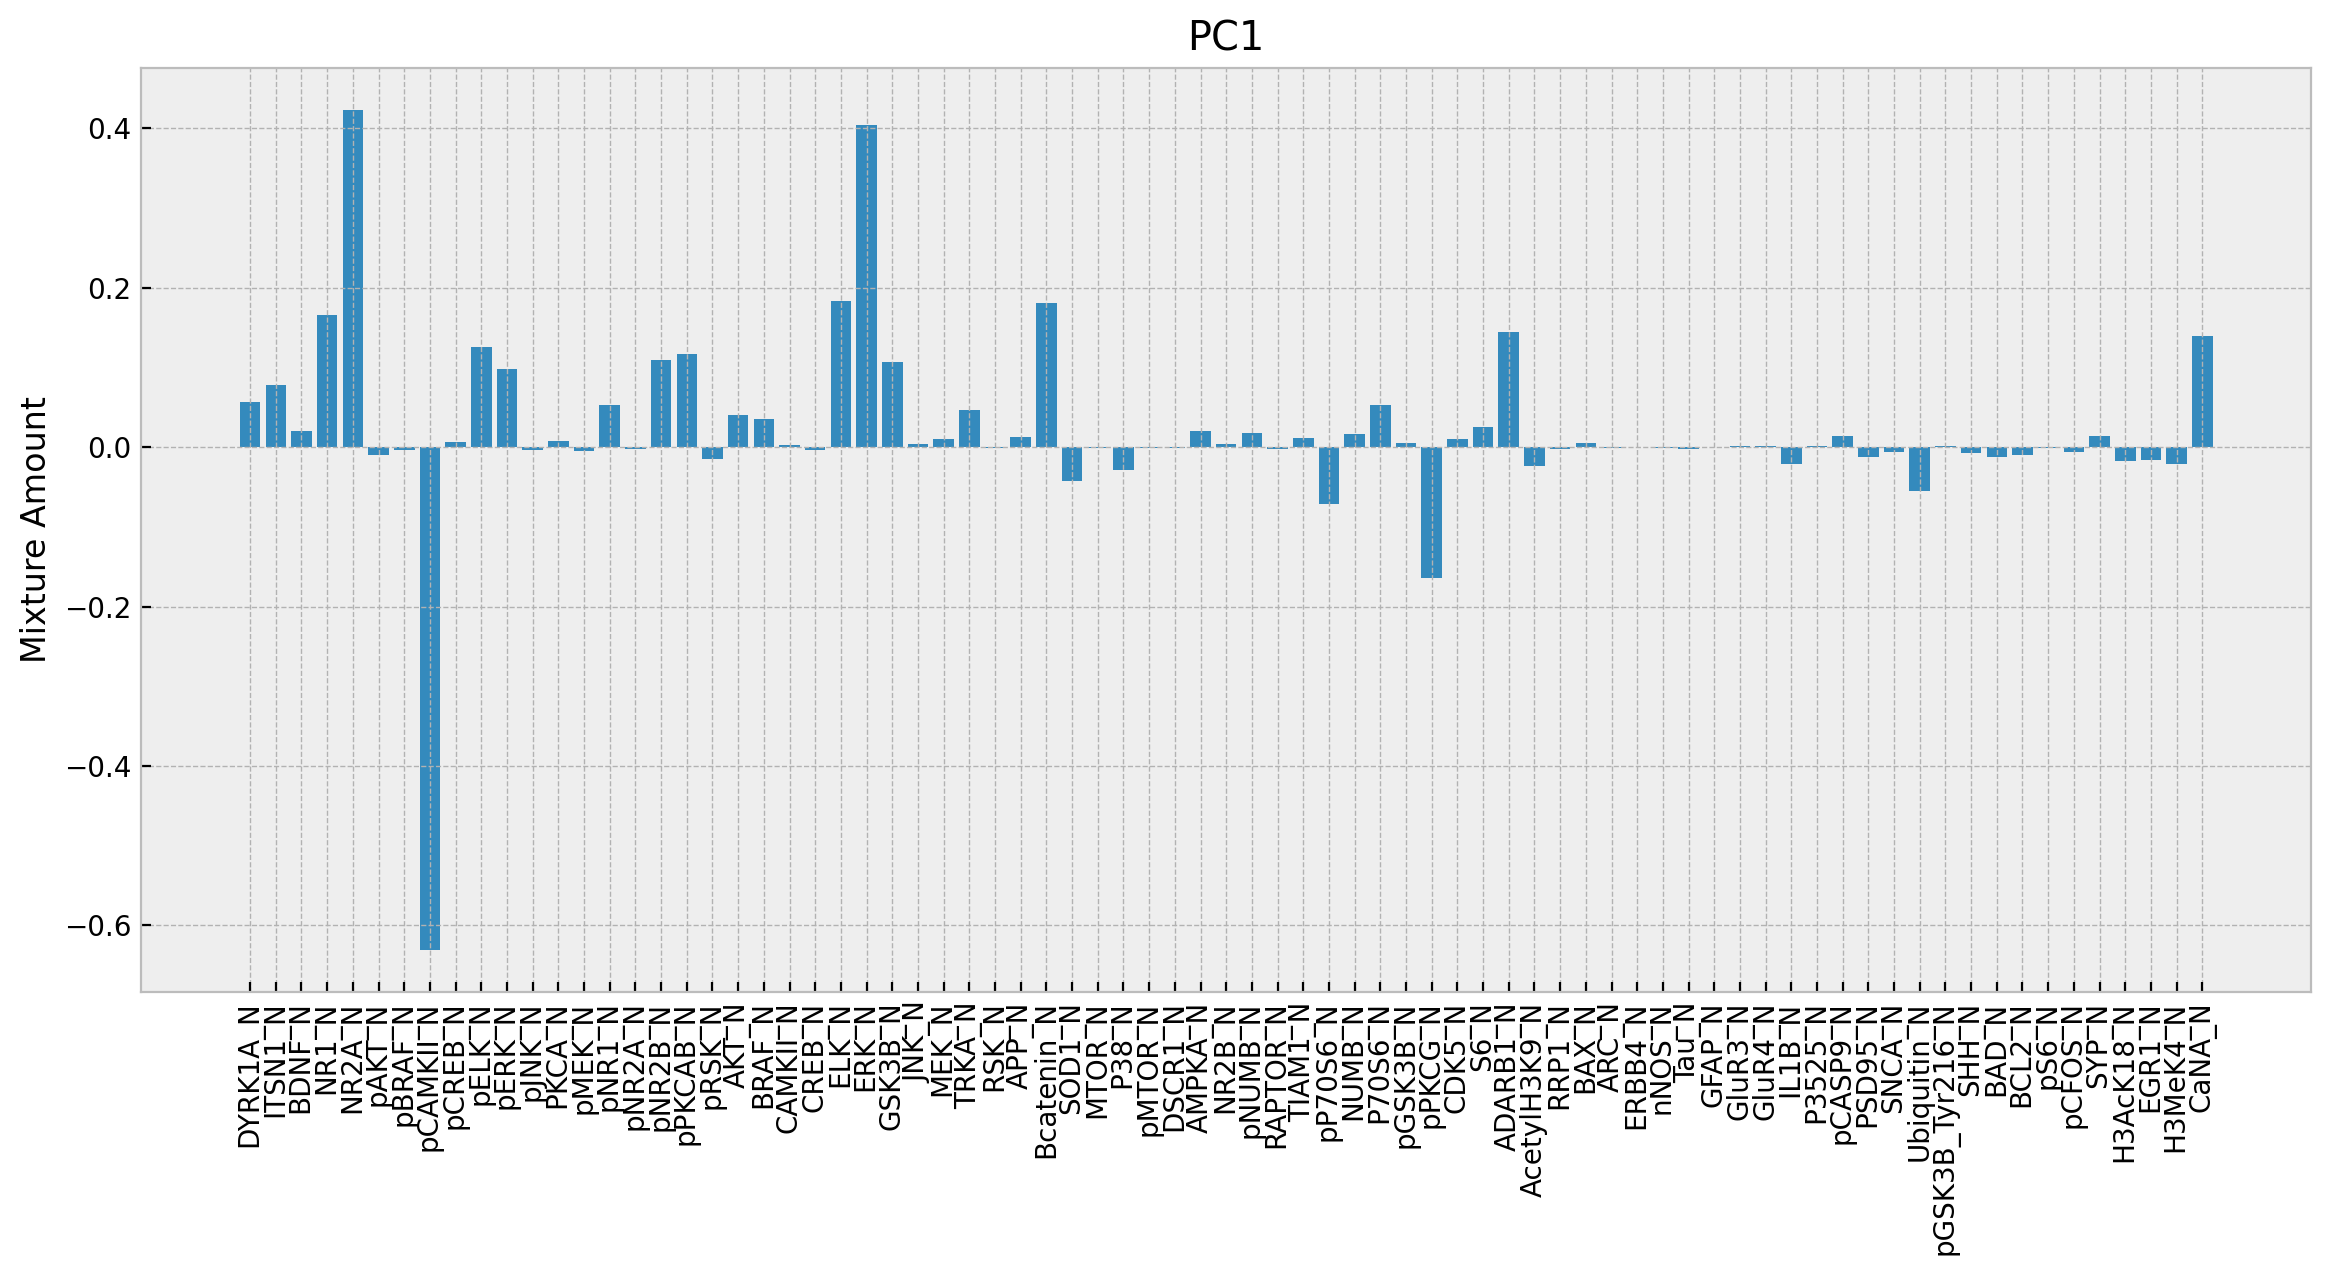

In [91]:
i = 1
plt.figure(figsize=(14, 6))
plt.bar(range(77), model.components_[i])
plt.xticks(range(77), X.columns, rotation='vertical')
plt.ylabel('Mixture Amount')
plt.title(f'PC{i}');

You have thrown away some information, but NOT by getting rid of specific features. Instead you have thrown out small variations spread across all of the features.

This can massively reduce the size of high dimensional datasets and greatly simplify their analysis.

This can also help account for correlations in the data feature space by reducing multiple correlated features to a single principal component.

You can optionally specify how much of the total variance you want to explain rather than the number of principal components.

The following will retain the minimum number of principal components to account for at least 95% of the variance in the dataset.

In [92]:
X = df.loc[:,'DYRK1A_N':'CaNA_N']

model = PCA(0.95)
model.fit(X)

model.n_components_

9

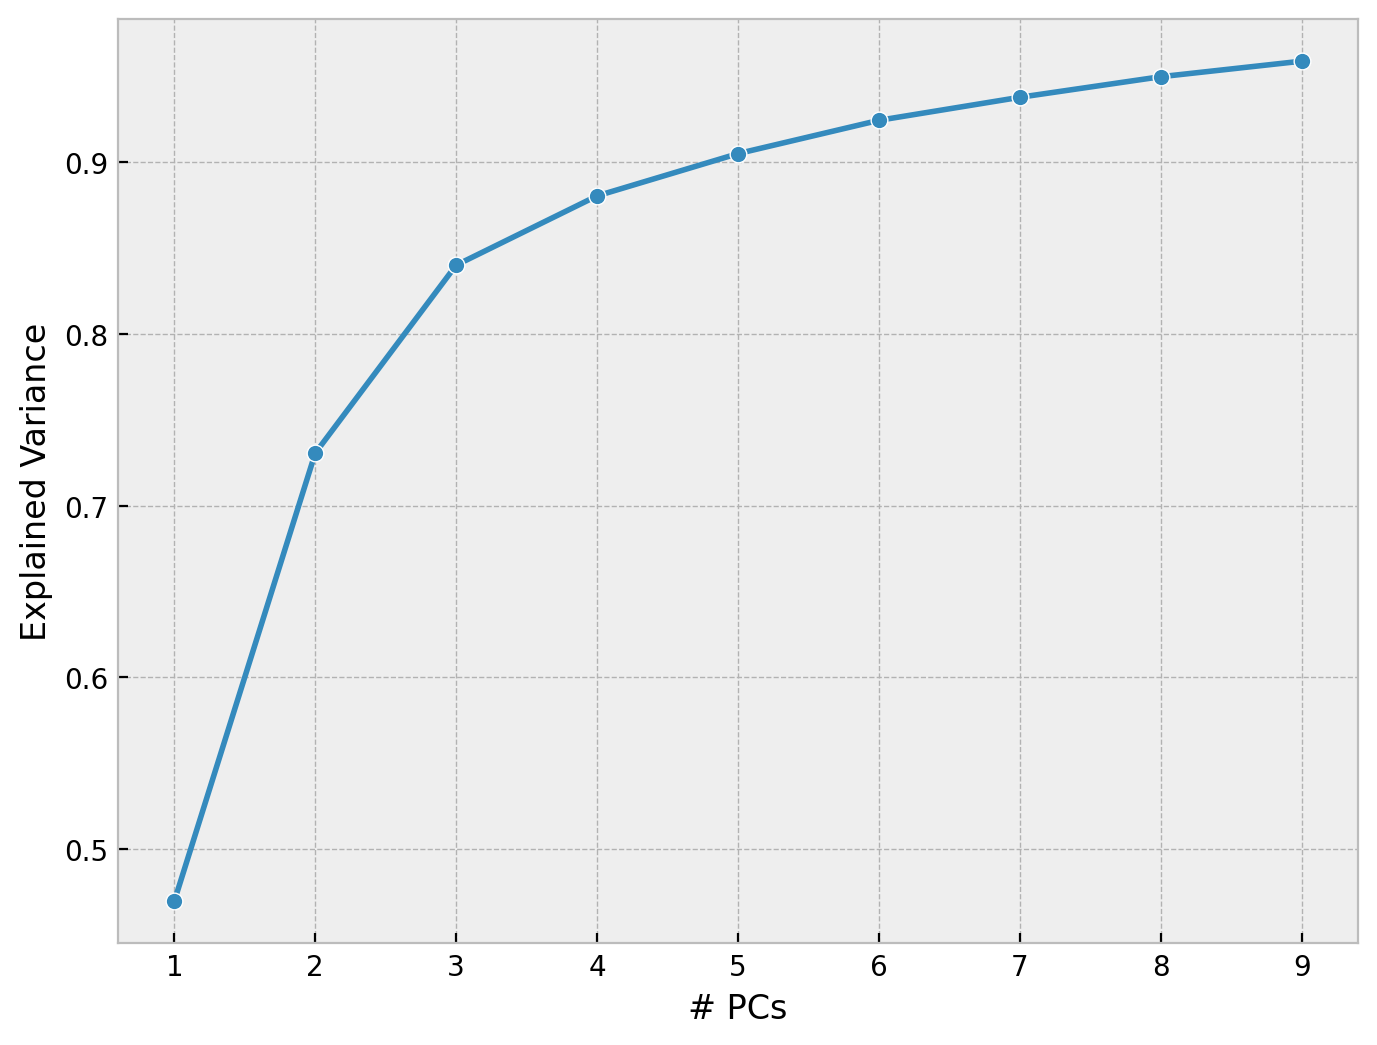

In [93]:
n = np.arange(1, 10)
plt.plot(n, np.cumsum(model.explained_variance_ratio_), 'o-')
plt.xticks(n)
plt.xlabel('# PCs')
plt.ylabel('Explained Variance');

# Question?

What is the dimensionality (length) of each of the 9 principal component vectors and what does it represent?

# Question?

What fraction of the original 77 protiens have we thrown out ALL INFORMATION for upon compressing the data with ONLY 9 principal components?

### Learning goals - *PCA*
|  |  |  |
|--|--|--|
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will visualize the process of changing your perspective to align with the variance in the data.</div> | |
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will visualize the effects of projecting the data onto a smaller number of principal components.</div> | |
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will be able to interpret the principal components as axes in the original data space.</div> | |
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will be able to quantify the amount of variance explained by any given number of principal components.</div> | |

# Principal Component Analysis (PCA) for images

Examples adapted from https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

### Learning goals - *PCA for images*
|  |  |  |
|--|--|--|
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will understand how images can be represented as points in a high dimensional space.</div> | |
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will be able to apply PCA to images.</div> | |
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will see how PCA can be used as a filter to remove noise.</div> | |

### Images of hand drawn digits

Each 8x8 grayscale image is a point in a 64-dimensional space representing the instensity of each of the 64 pixels in the image.

In [94]:
from sklearn.datasets import load_digits

digits = load_digits()
images = digits.data
numbers = digits.target

images.shape, numbers.shape

((1797, 64), (1797,))

Each row of `images` is a 64-dimensional data point representing an image of a hand drawn digit.

`numbers` are the numerical values 0-9 that each of the 1797 images correspond to.

Visualizing an image of a digit

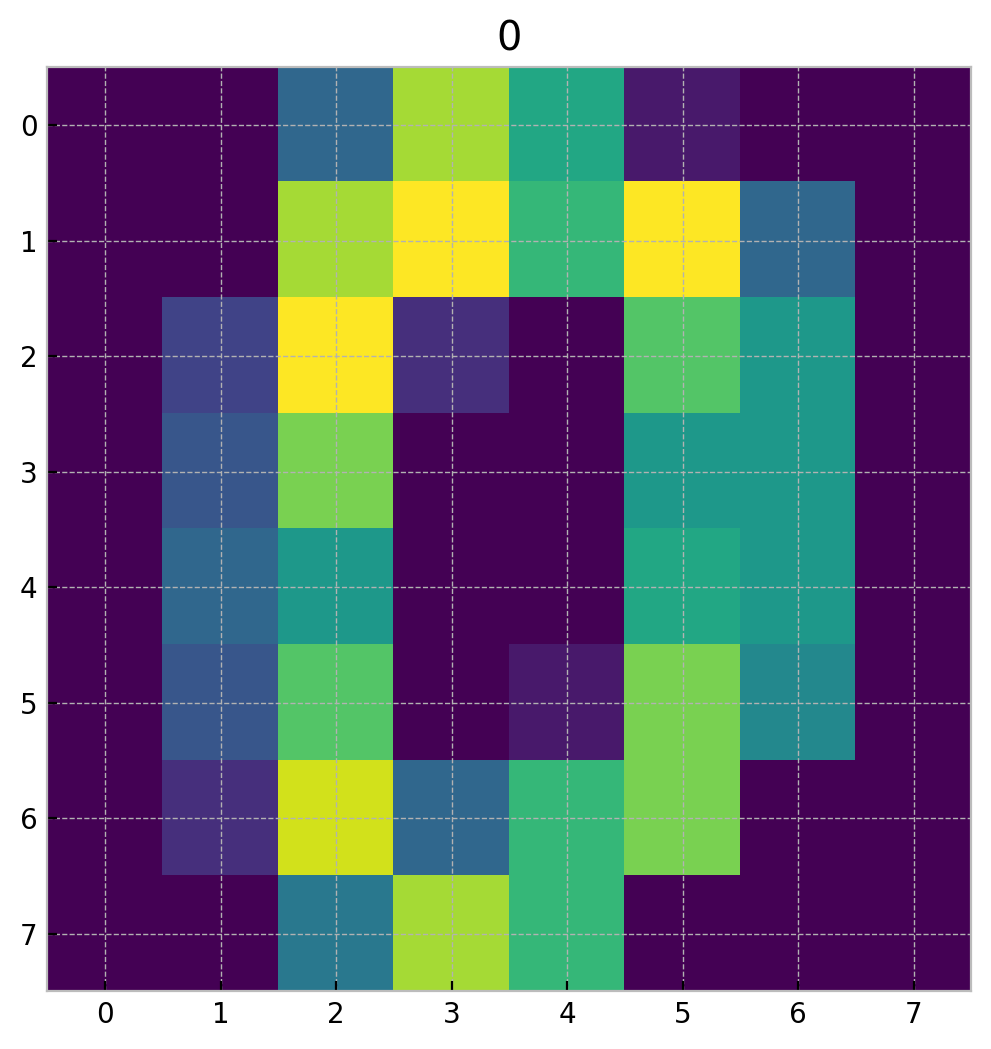

In [95]:
i = 0
plt.imshow(images[i,:].reshape(8, 8))
plt.title(f'{numbers[i]}');

### Visualize a bunch of images

In [96]:
def plot_digits(images, rows=5, cols=10):
    fig, ax = plt.subplots(rows, cols, figsize=(2*cols, 2*rows))
    k = 0
    for i in range(rows):
        for j in range(cols):
            ax[i,j].imshow(images[k,:].reshape(8, 8))
            ax[i,j].set_xticks([])
            ax[i,j].set_yticks([])
            k += 1

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[0 9 5 5 6 5 0 9 8 9]
[8 4 1 7 7 3 5 1 0 0]


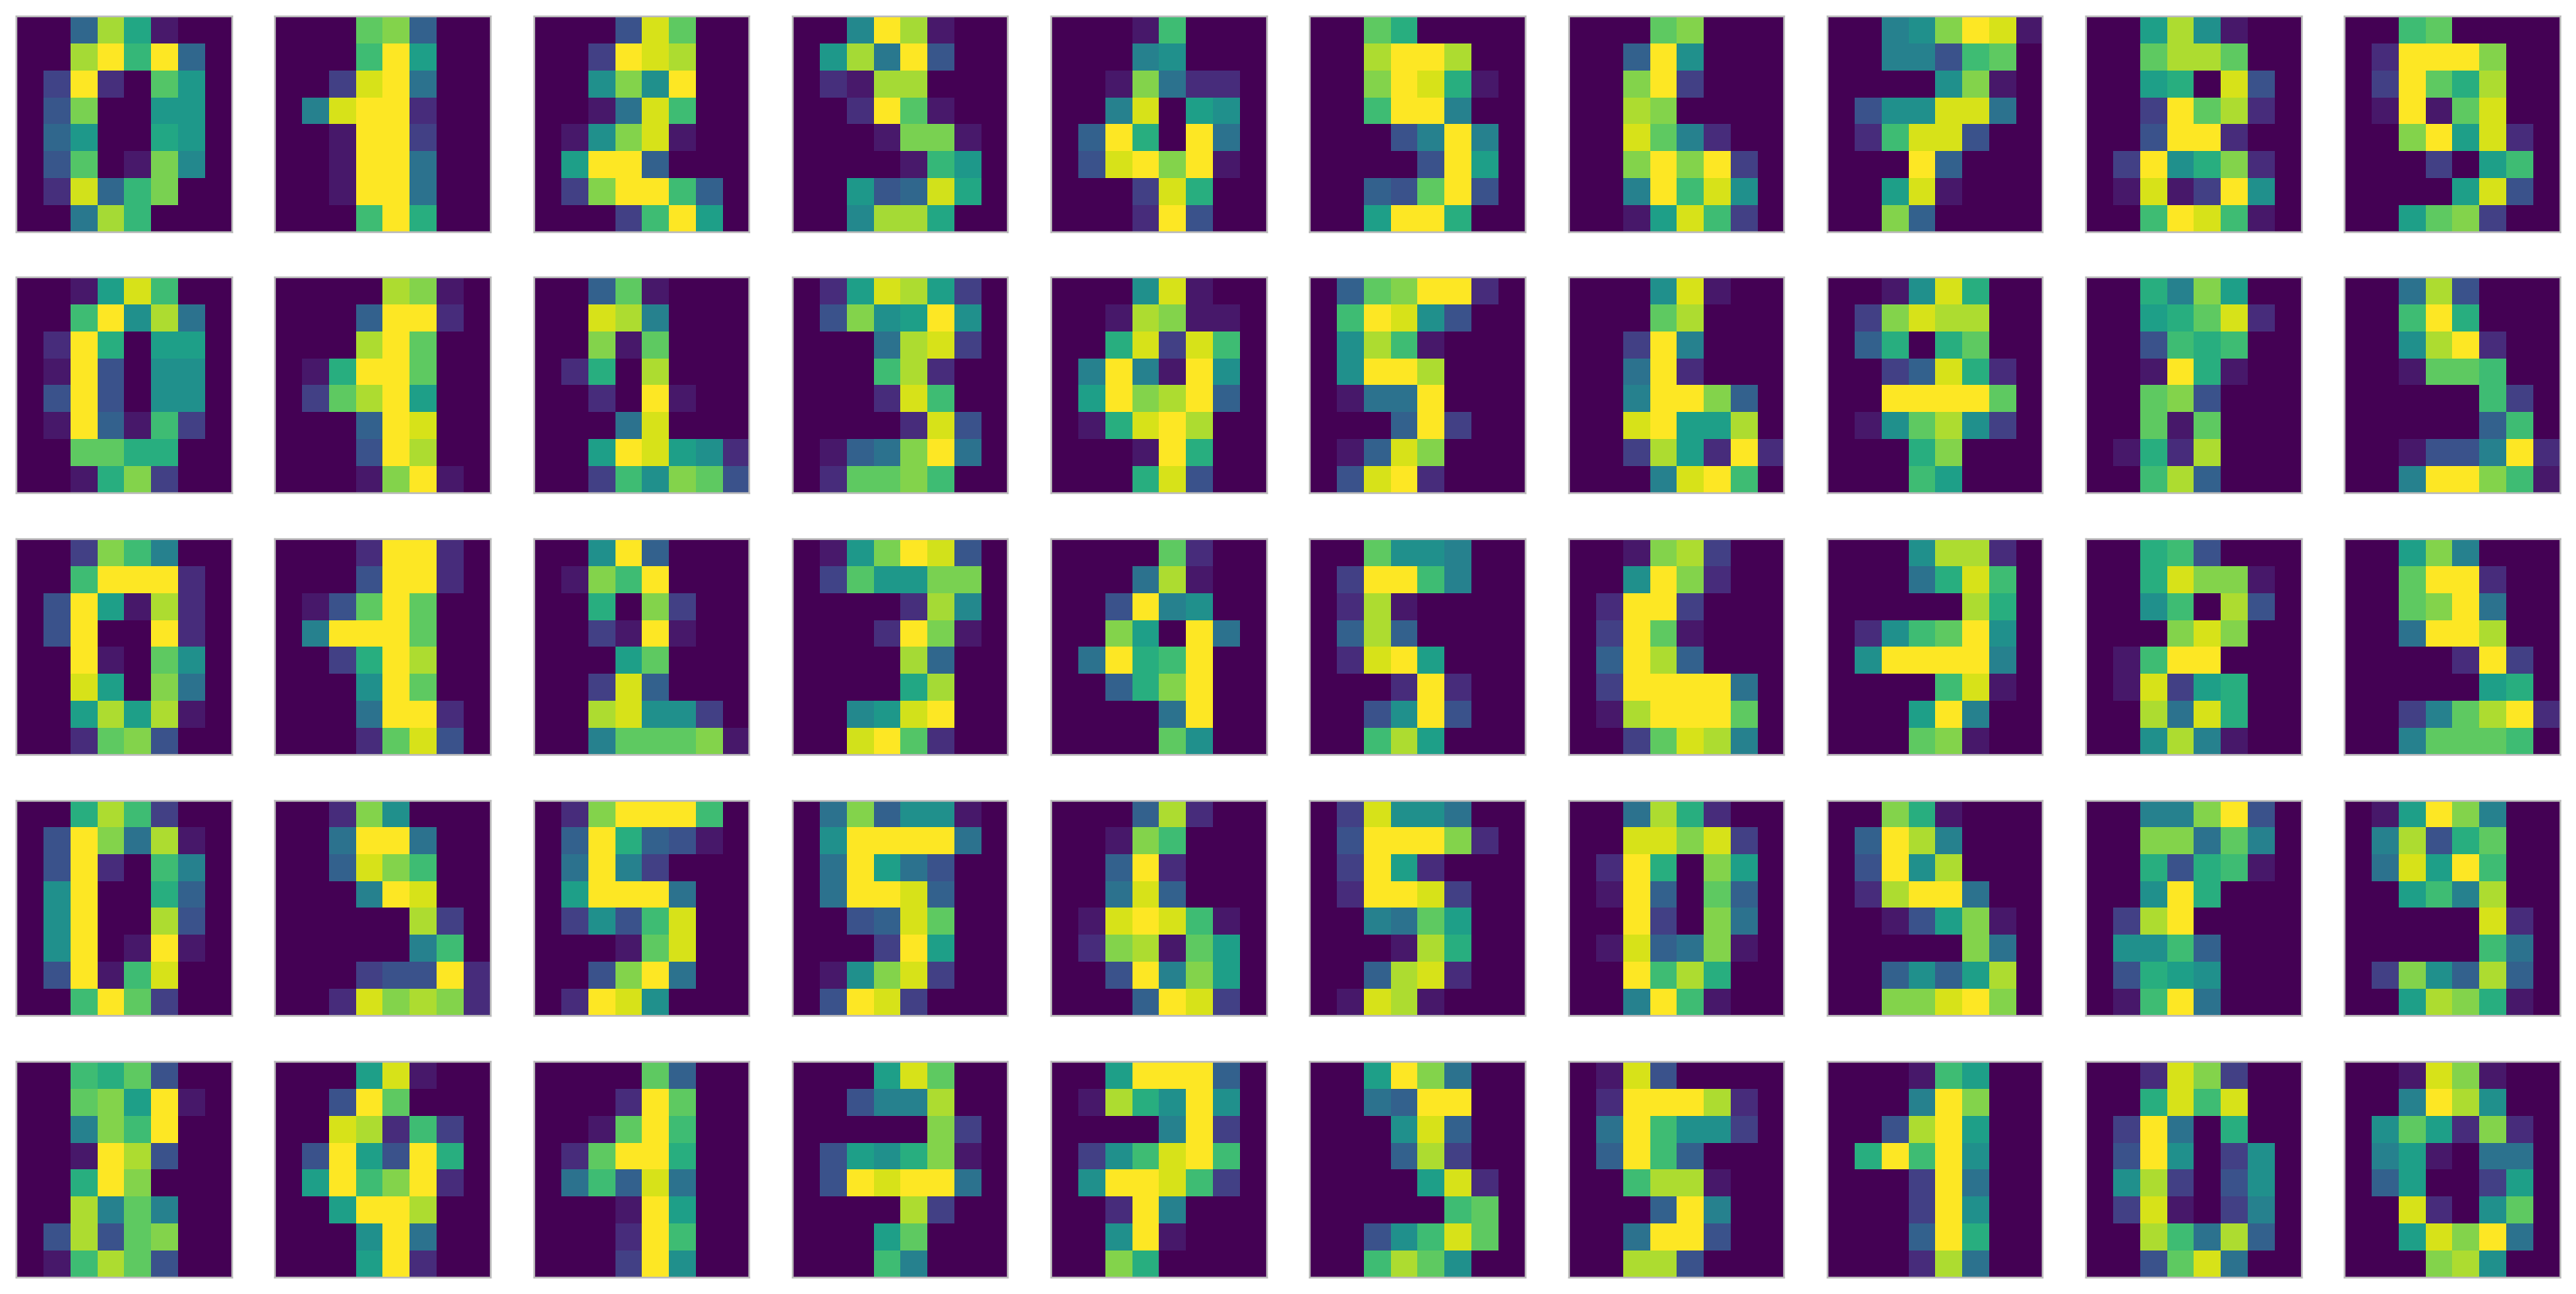

In [97]:
plot_digits(images)

for i in range(5):
    print(numbers[i*10:i*10+10])

Project 64-dimensional images onto a 2-dimensional space for visualization.

In [98]:
from sklearn.decomposition import PCA

model = PCA(2)  # project from 64 to 2 dimensions
images_pc = model.fit_transform(images)

print(images.shape)
print(images_pc.shape)

(1797, 64)
(1797, 2)


The two principal components are mixtures of the original 64 dimensions (i.e. mixtures of the original pixel intensities), and thus can themselves be represented as images.

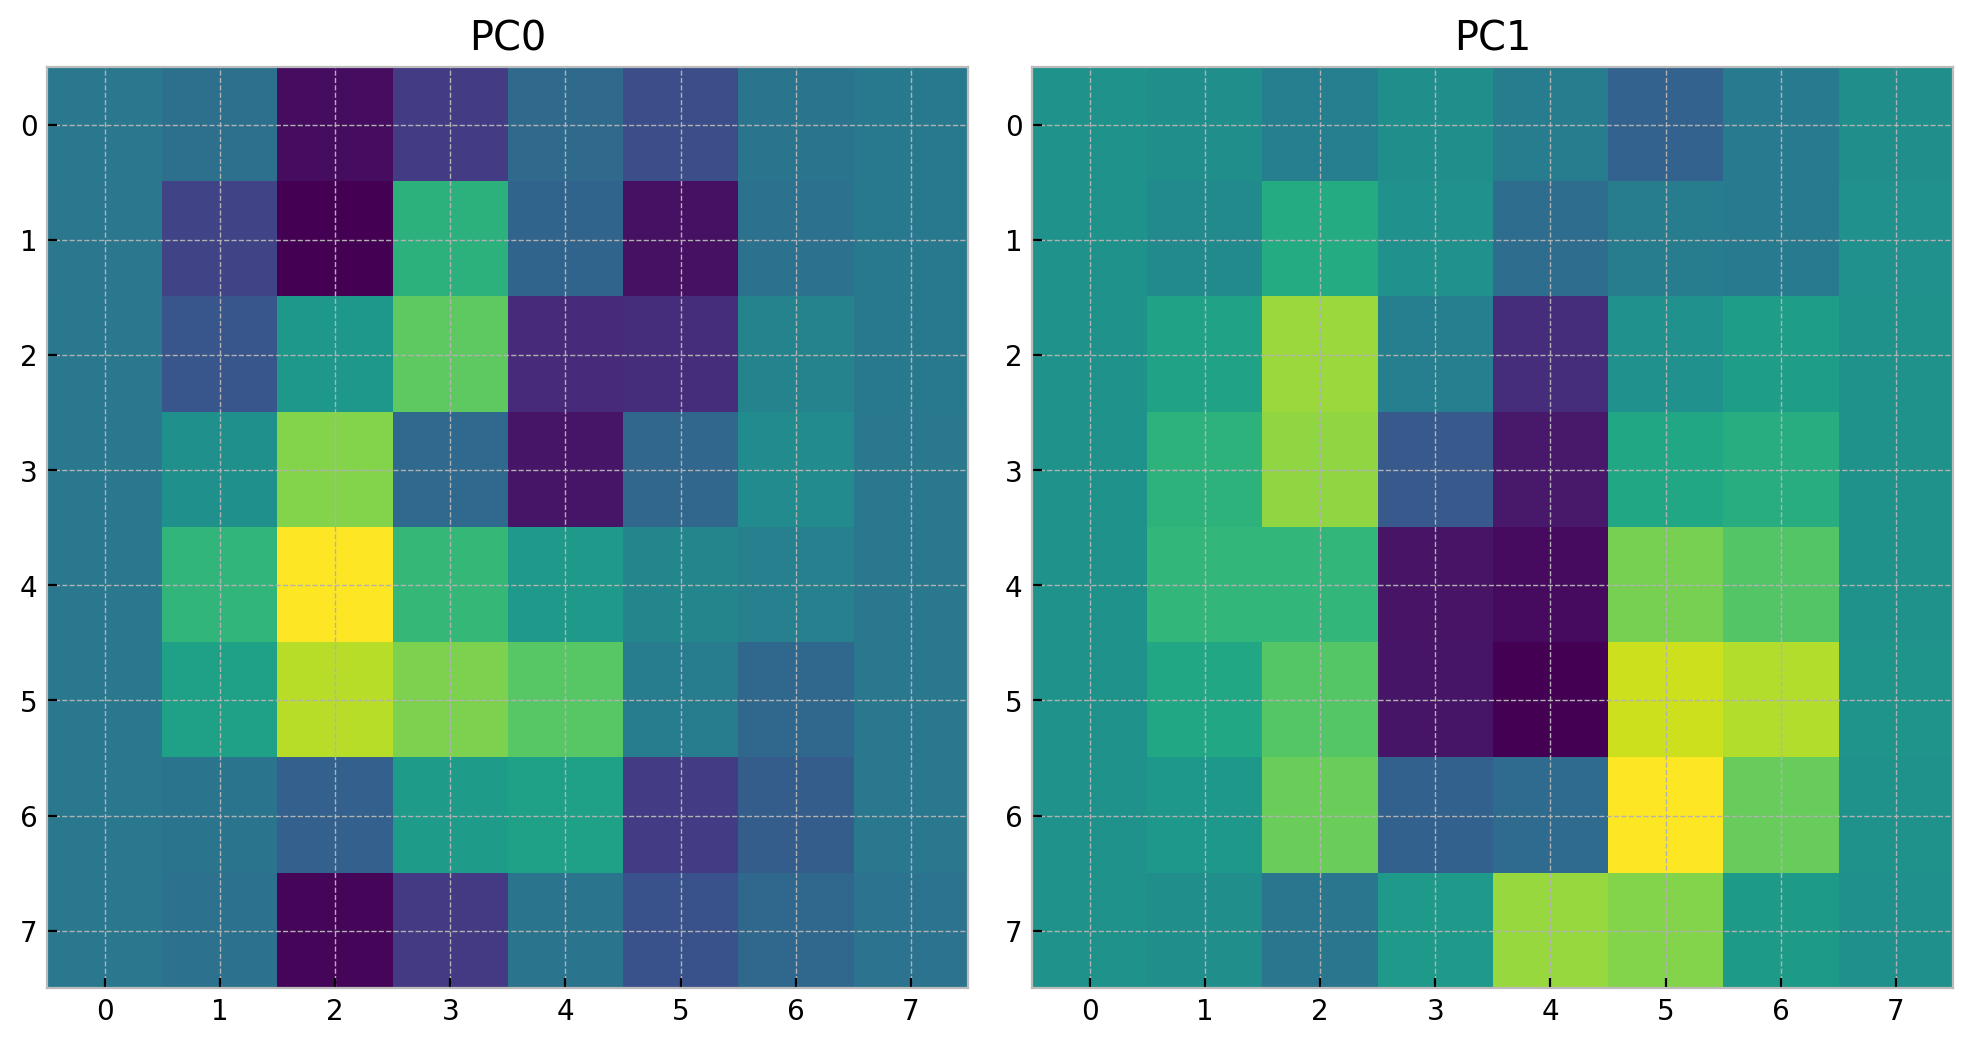

In [99]:
plt.figure(figsize=[10,5])
plt.subplot(1, 2, 1)
plt.imshow(model.components_[0].reshape(8, 8))
plt.title('PC0');
plt.subplot(1, 2, 2)
plt.imshow(model.components_[1].reshape(8, 8))
plt.title('PC1');
plt.tight_layout();

How do the images cluster according to their digit value in this vastly reduced 2-dimensional space?

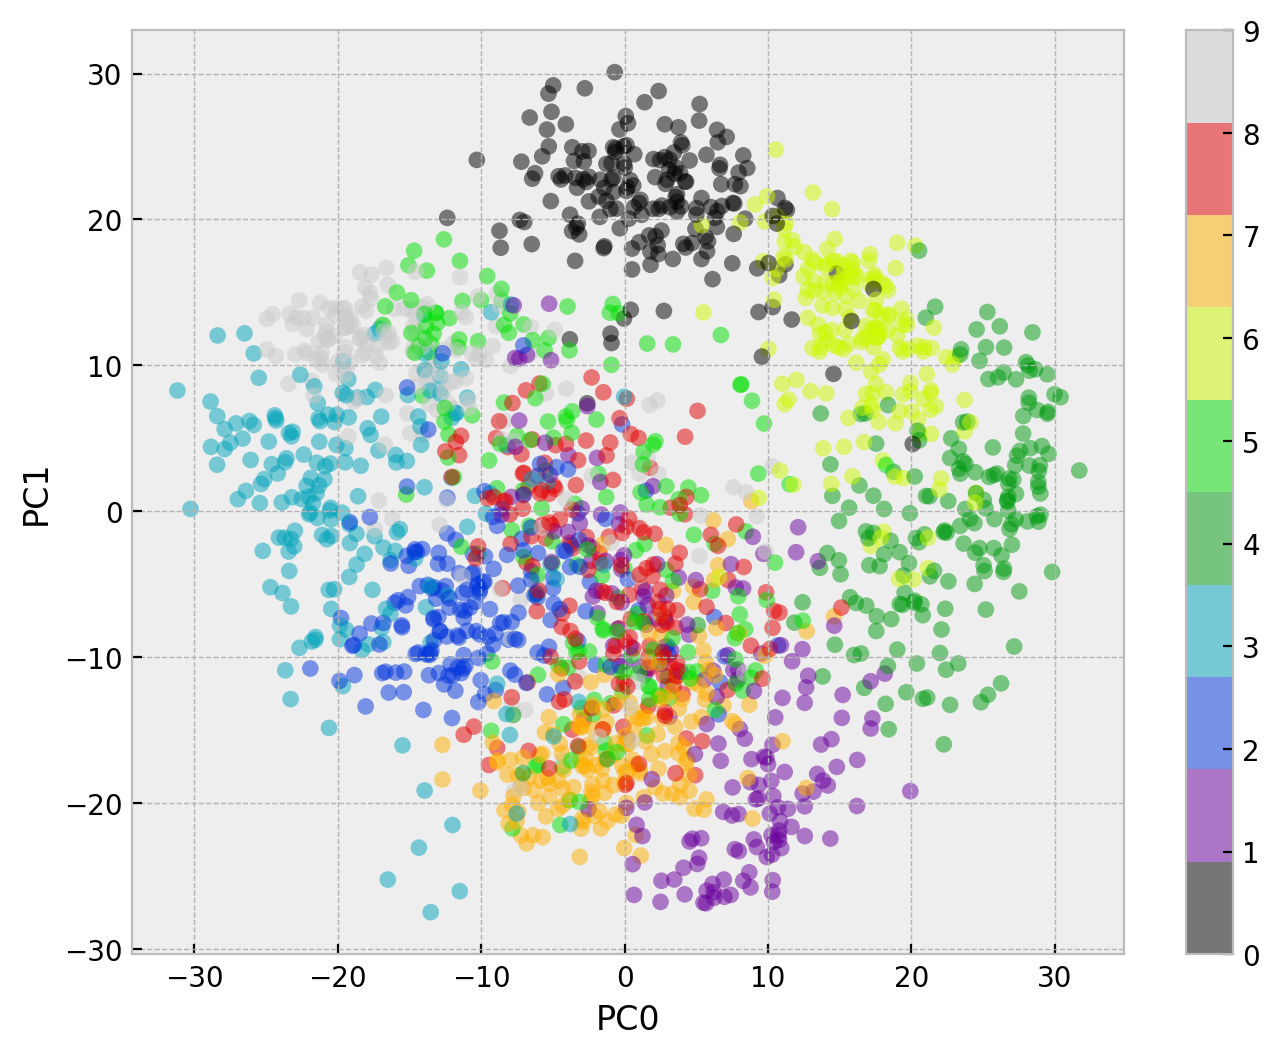

In [100]:
plt.scatter(images_pc[:,0], images_pc[:,1],
            c=numbers, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.colorbar();

What do the images look like after projecting onto only two PCs?

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[0 9 5 5 6 5 0 9 8 9]
[8 4 1 7 7 3 5 1 0 0]


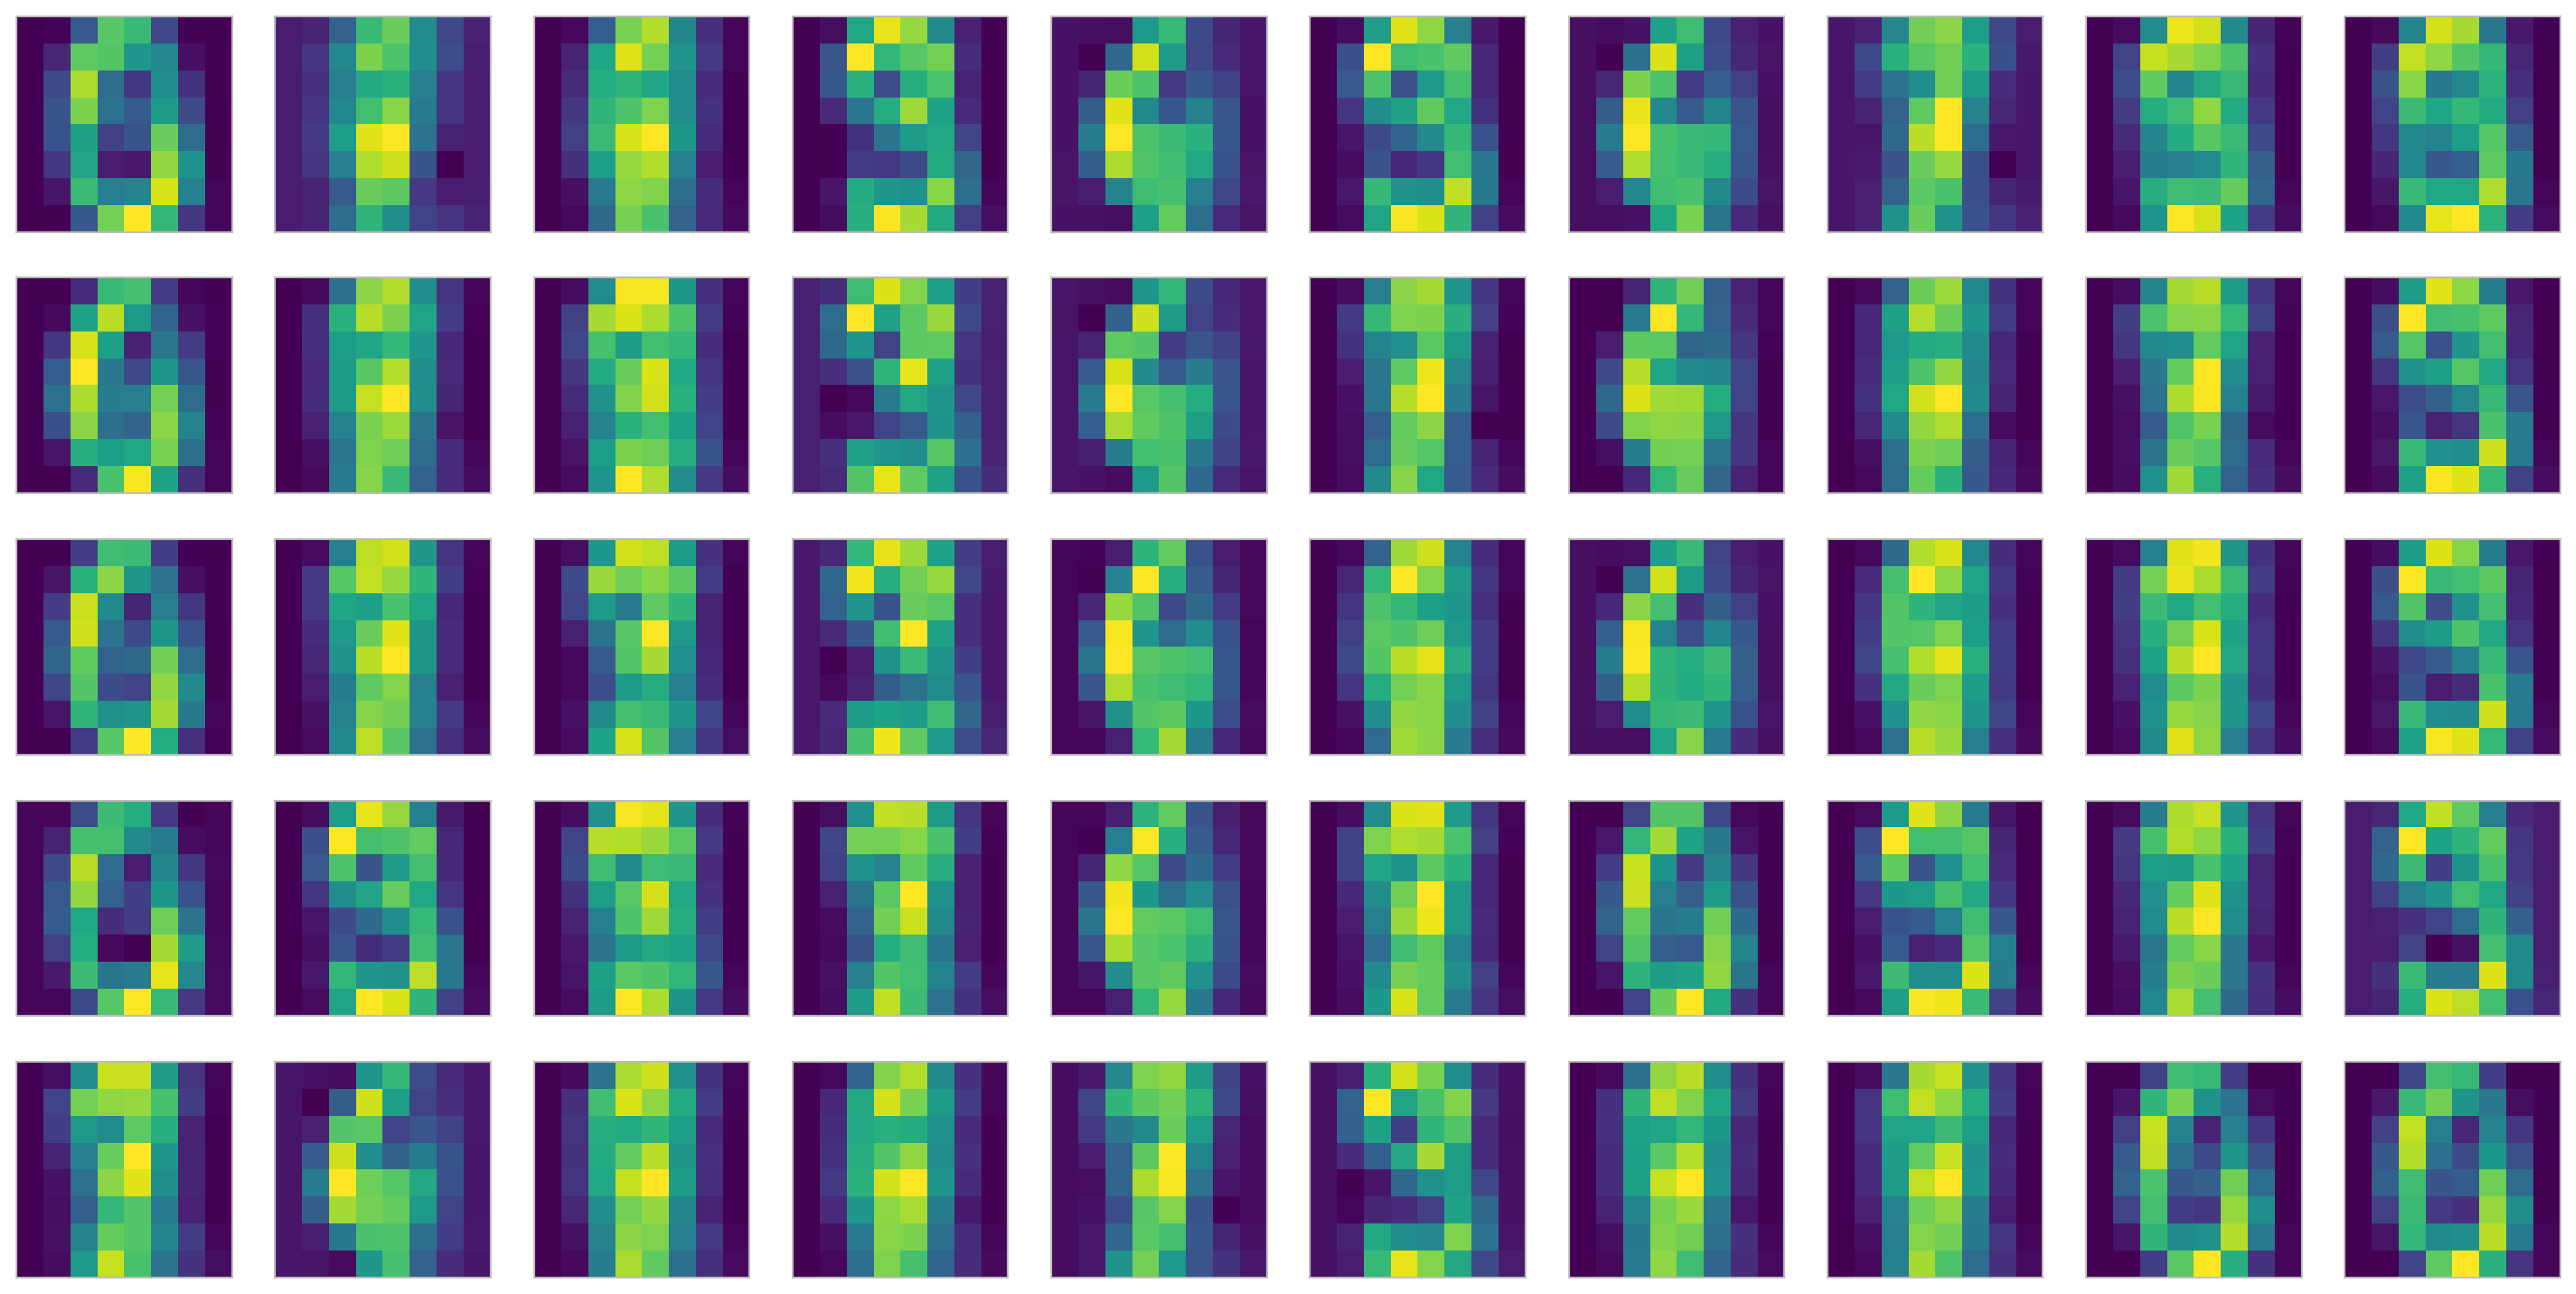

In [101]:
images_projected = model.inverse_transform(images_pc)

plot_digits(images_projected)

for i in range(5):
    print(numbers[i*10:i*10+10])

How well did we do at explaining the variance in the image data with only two PCs?

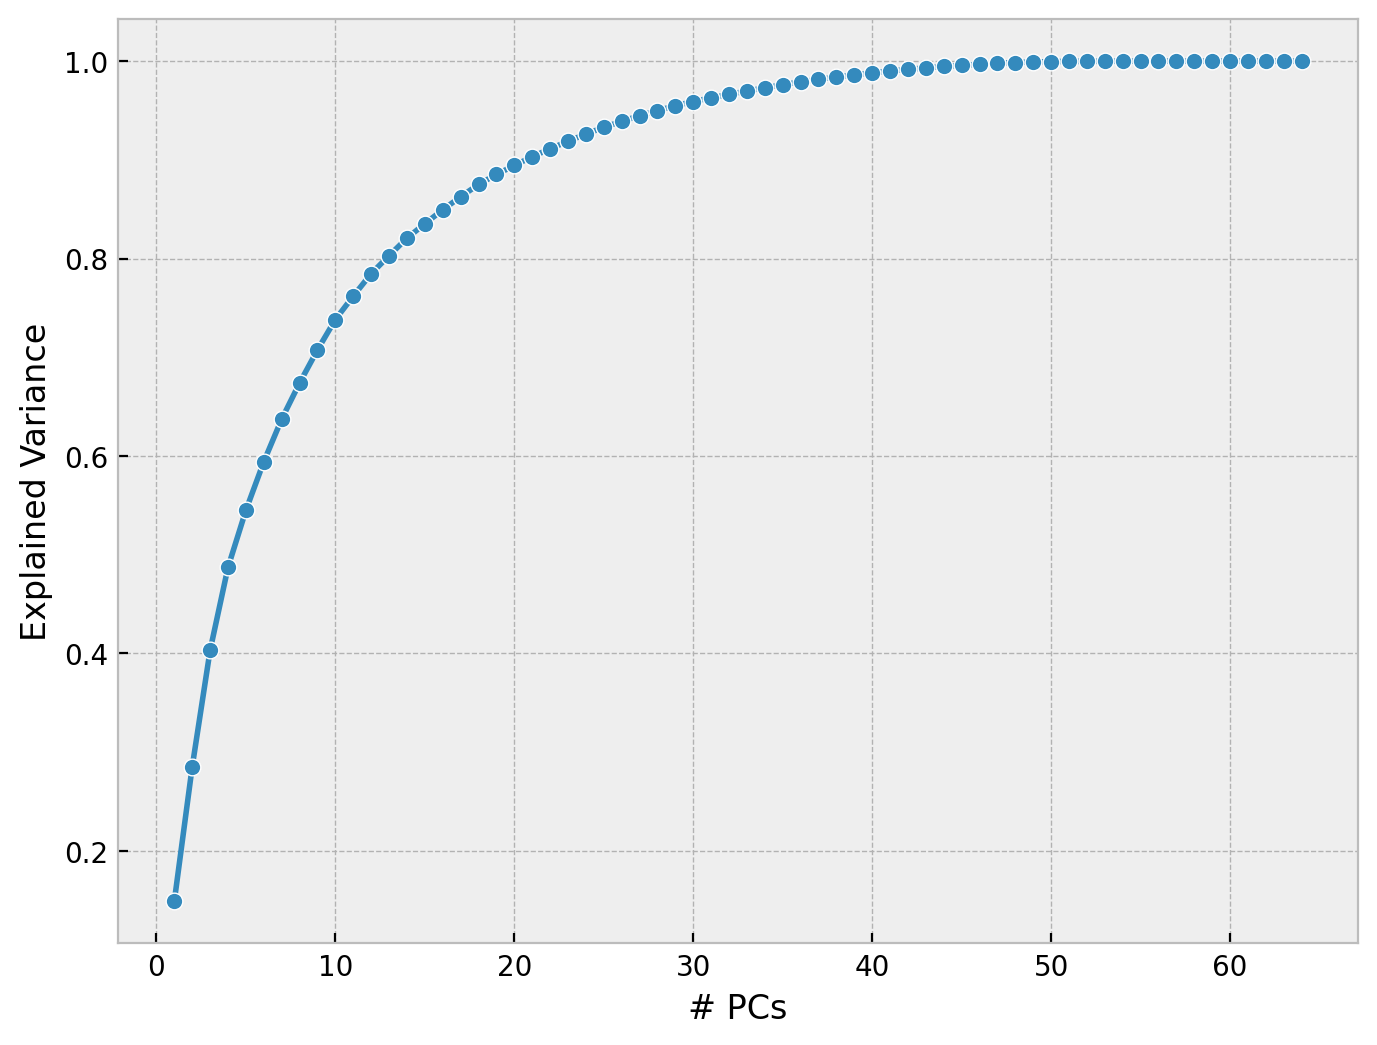

In [102]:
model = PCA()
model.fit(images)

n = np.arange(1, model.n_components_ + 1)
plt.plot(n, np.cumsum(model.explained_variance_ratio_), 'o-')
plt.xlabel('# PCs')
plt.ylabel('Explained Variance');

# Exercise

Use PCA to project the images dataset onto as many dimensions as needed to explain 90% of the variance.

In [ ]:
model = ...
images_pc = ...
images_projected = ...

plot_digits(images_projected)

model.n_components_

# Exercise Key

Use PCA to project the images dataset onto as many dimensions as needed to explain 90% of the variance.

21

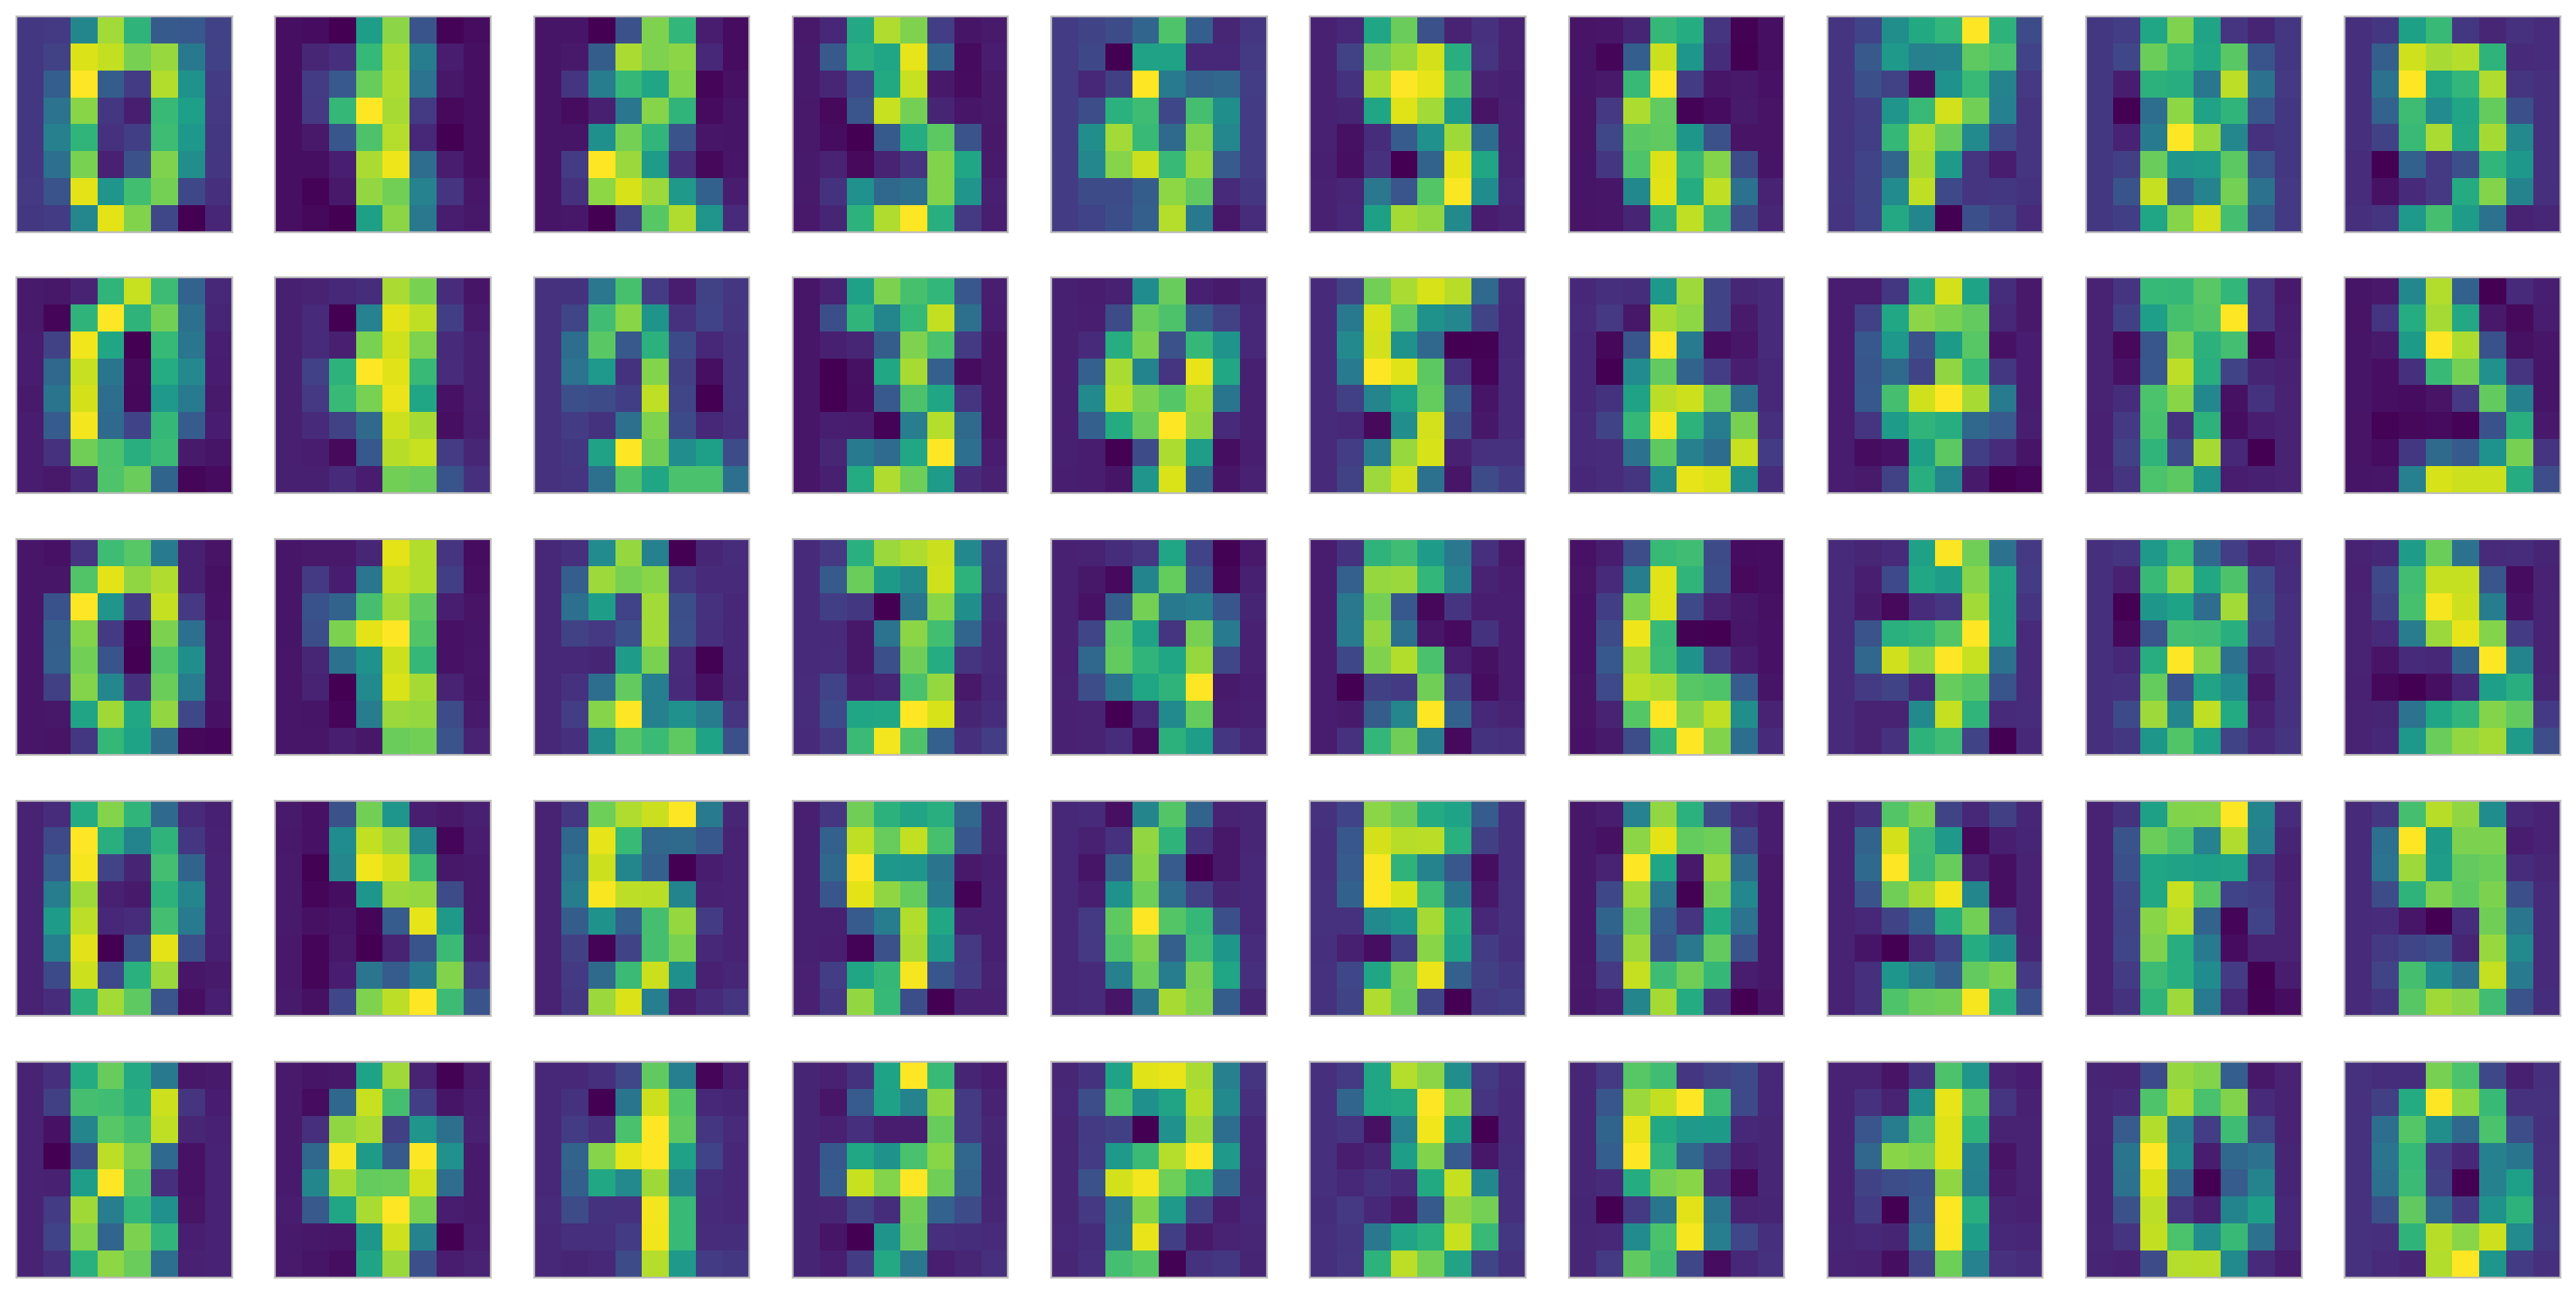

In [103]:
model = PCA(0.9)
images_pc = model.fit_transform(images)
images_projected = model.inverse_transform(images_pc)

plot_digits(images_projected)

model.n_components_

### PCA as a filter for noisy data

Adding some random noise to the images

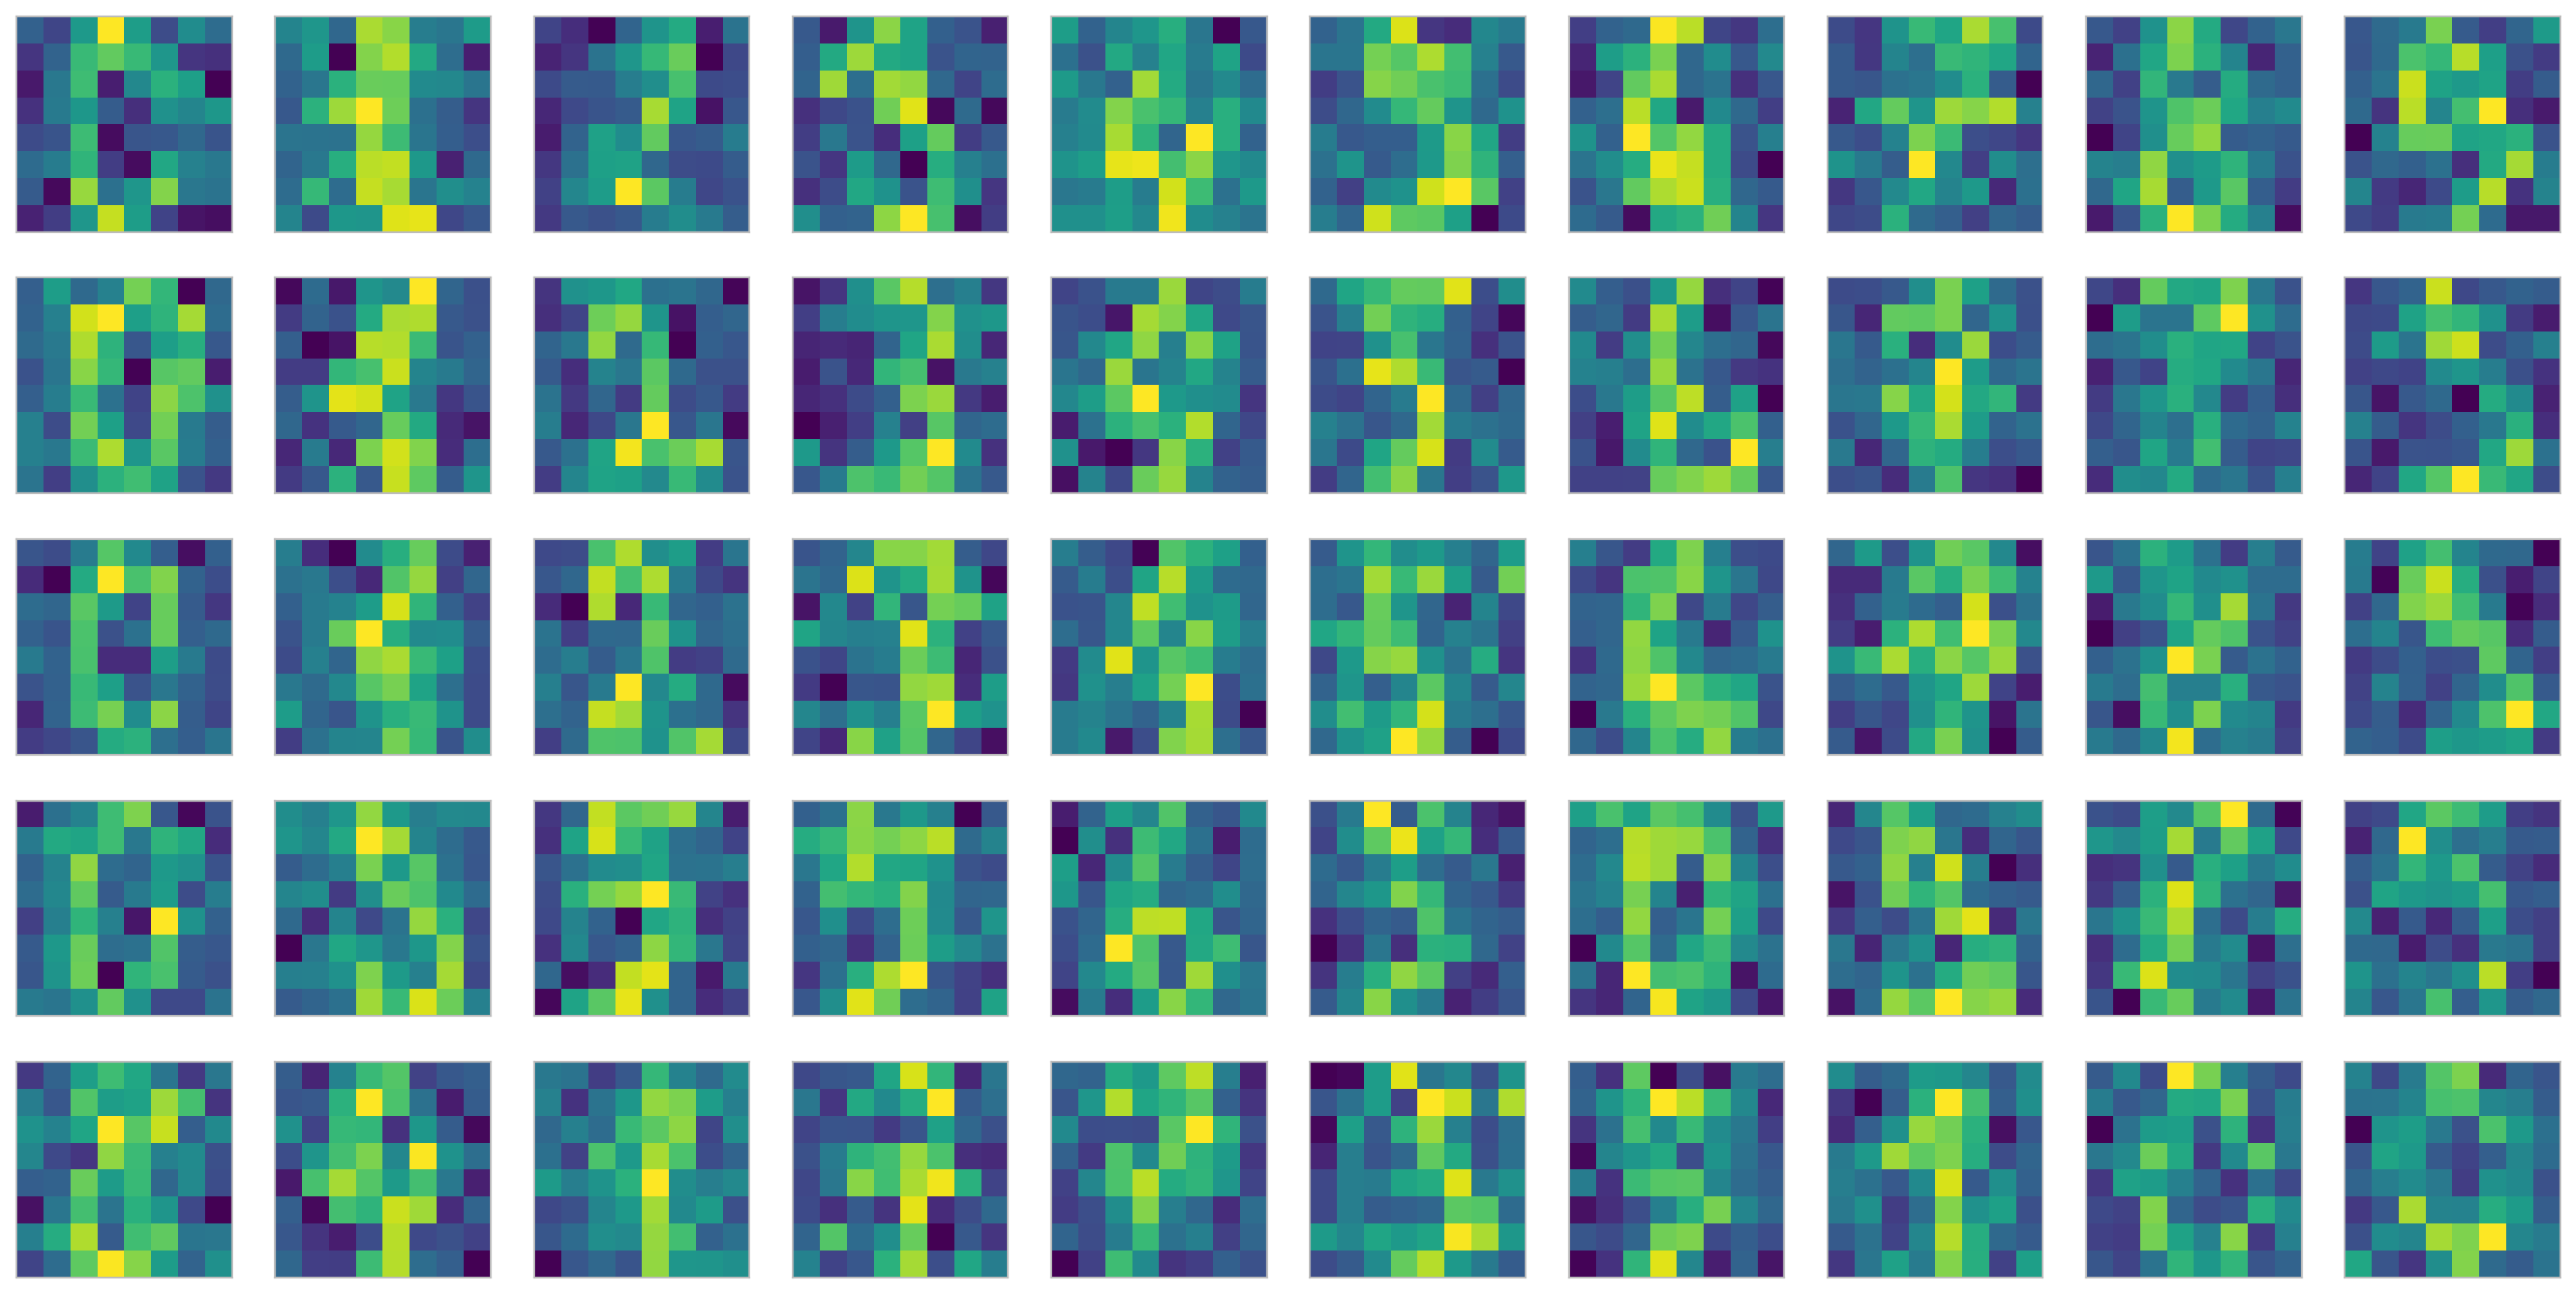

In [104]:
np.random.seed(42)
noisy_images = np.random.normal(images, 4)
plot_digits(noisy_images)

12

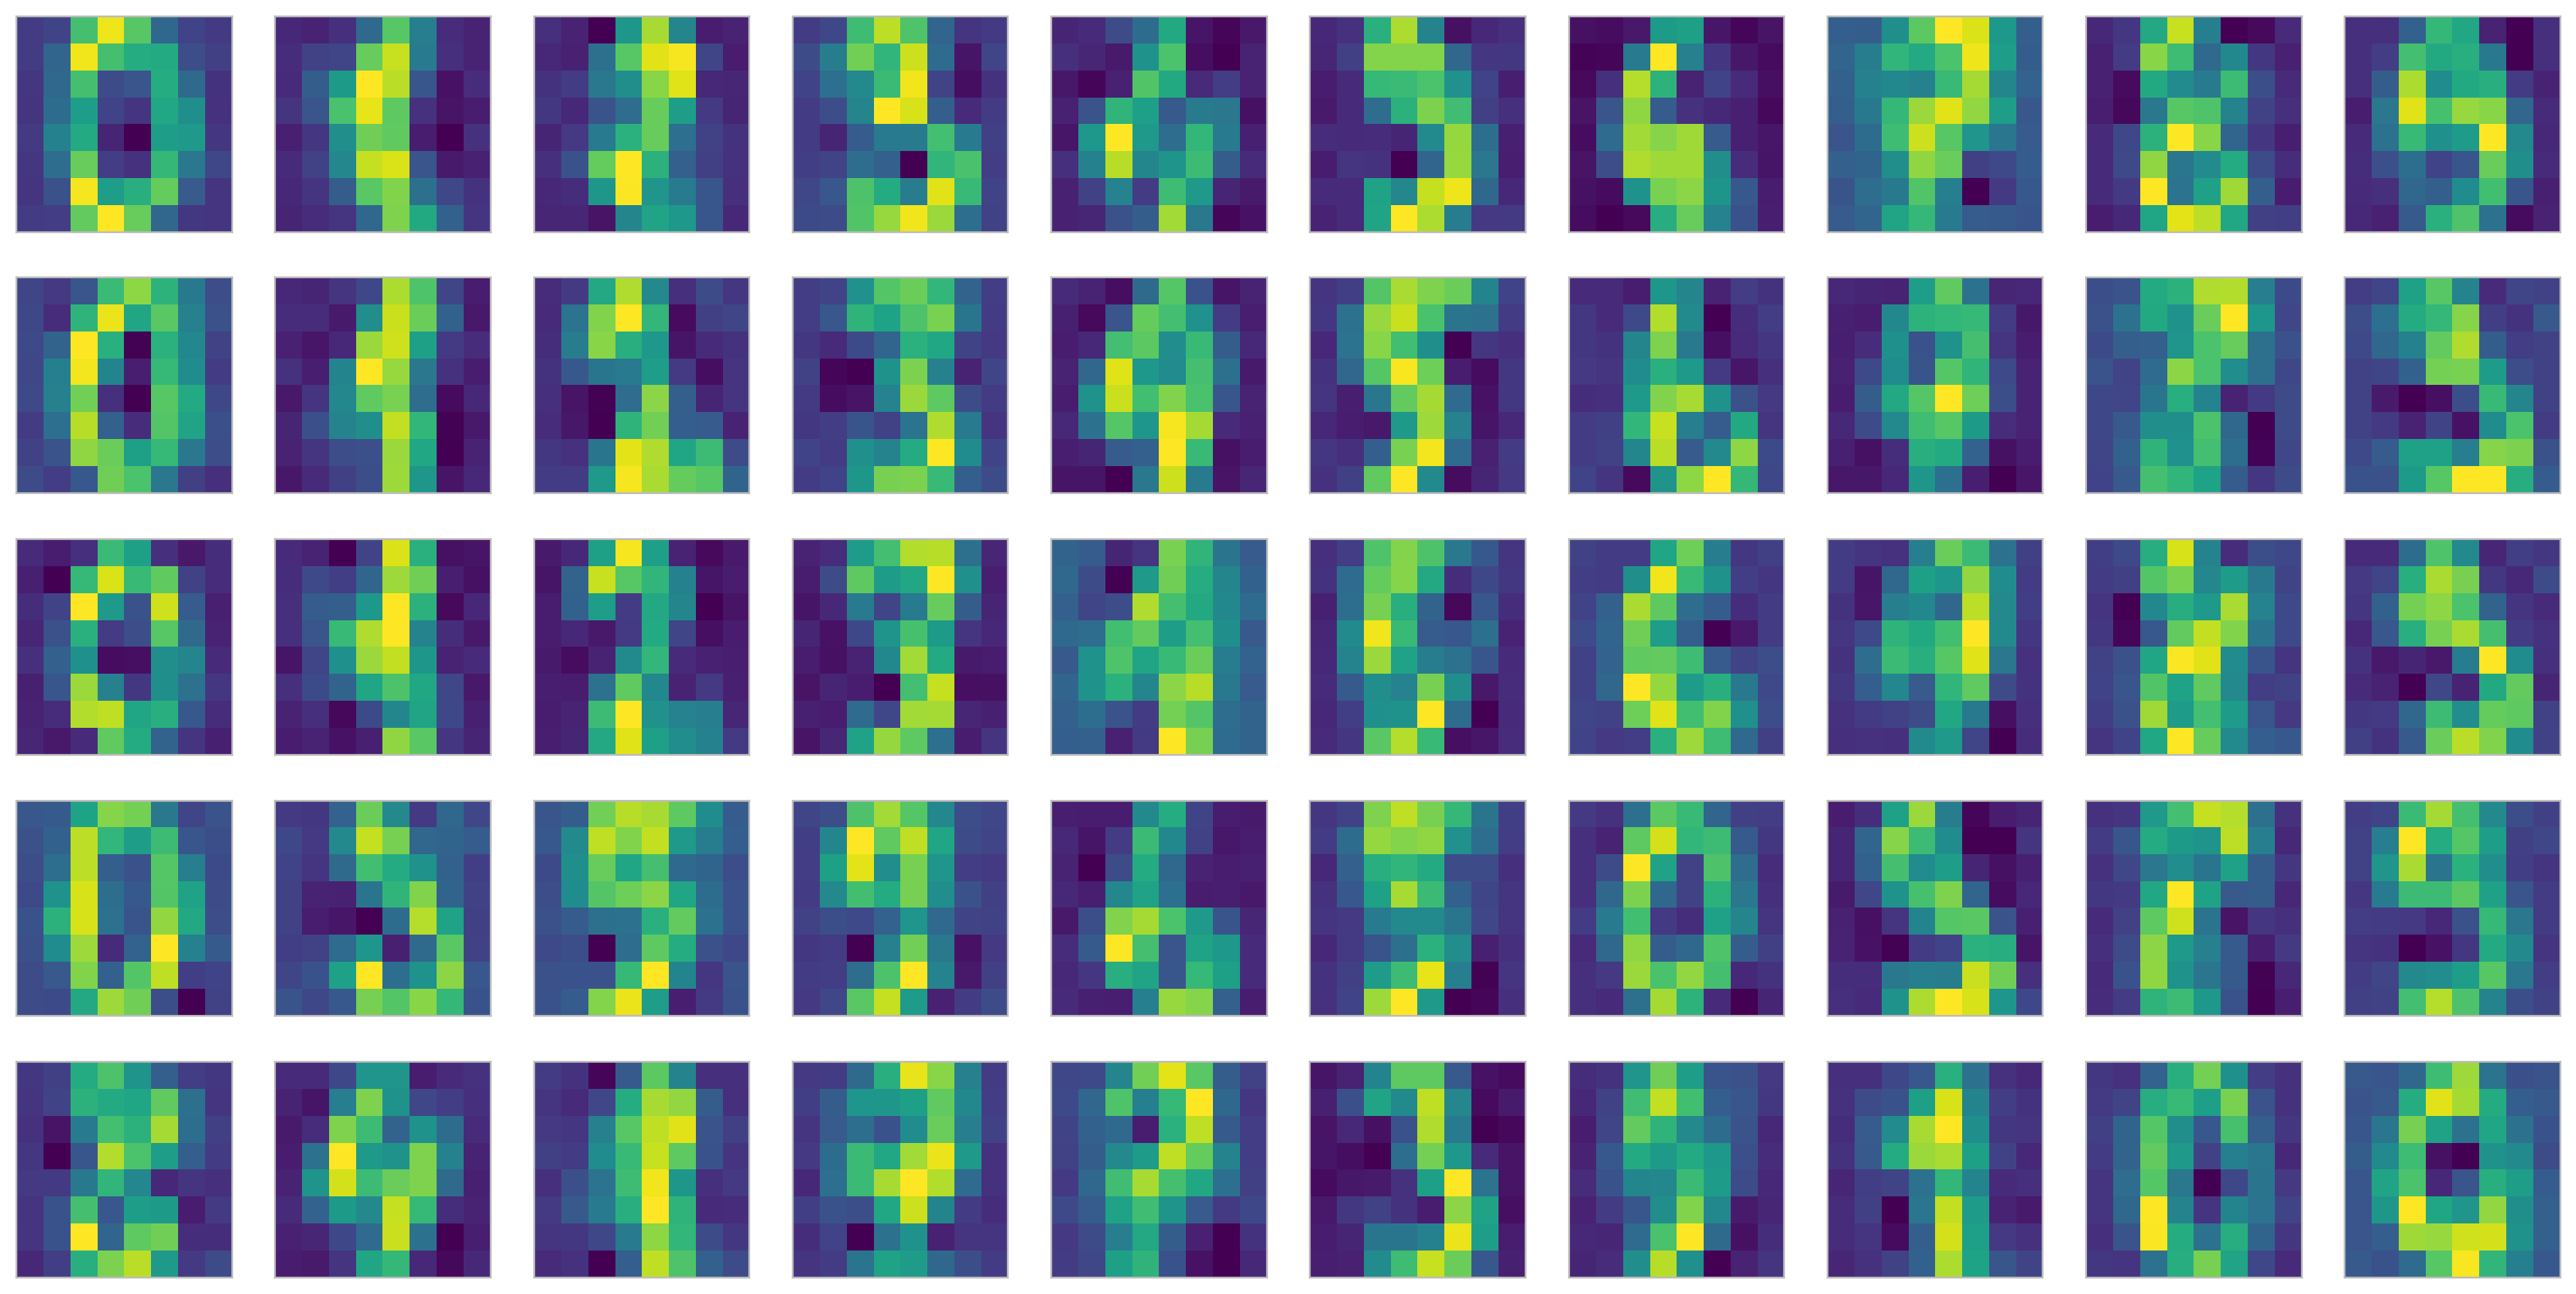

In [105]:
# PCA that preserves 50% of the variance in the data
model = PCA(0.50)
noisy_images_pc = model.fit_transform(noisy_images)
filtered_images = model.inverse_transform(noisy_images_pc)

plot_digits(filtered_images)
model.n_components_

### Eigenfaces

In [50]:
# WARNING !!! This is ~200 MB of data which may take a few minutes to download!
# Each face image is 62x47 pixels for a total of 2914 pixels
from sklearn.datasets import fetch_lfw_people
faces_data = fetch_lfw_people(min_faces_per_person=60)

In [51]:
# each row of faces is a 62x47 image of one of eight different people
faces = faces_data.data
labels = faces_data.target
names = faces_data.target_names

print(faces.shape)
print(labels.shape)
print(labels)
print(names)

(1348, 2914)
(1348,)
[1 3 3 ... 7 3 5]
['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


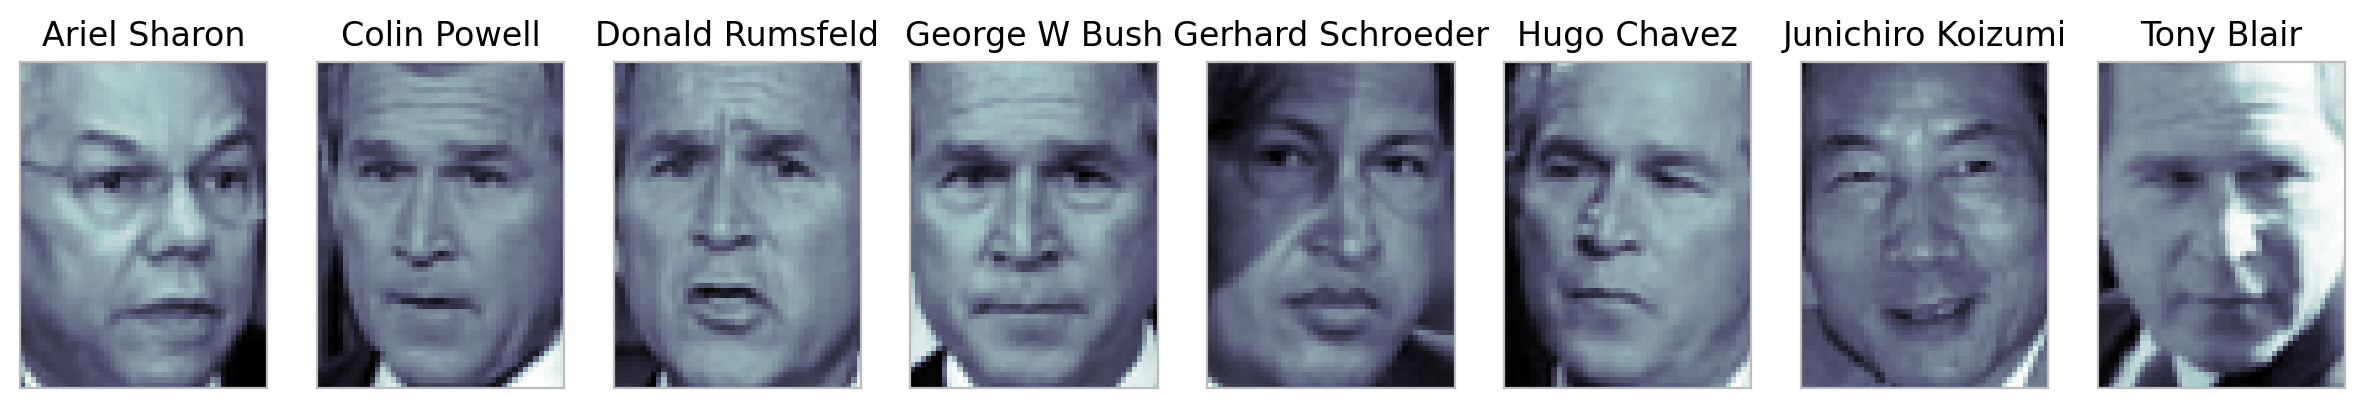

In [52]:
plt.figure(figsize=[15, 5])
for i in range(8):
    plt.subplot(1, 8, i+1)
    plt.imshow(faces[i].reshape(62,47), cmap='bone')
    plt.xticks([])
    plt.yticks([])
    plt.title(names[i], fontsize=12)

Project each 2914-dimensional images onto only 150 dimensions.

In [53]:
# PCA for first 150 principal components
# Randomized solver performs some approximates to speed up the computation for high dimensional data sets
model = PCA(n_components=150, svd_solver='randomized')
model.fit(faces)

PCA(n_components=150, svd_solver='randomized')

In [54]:
model.components_.shape

(150, 2914)

First 8 principal components

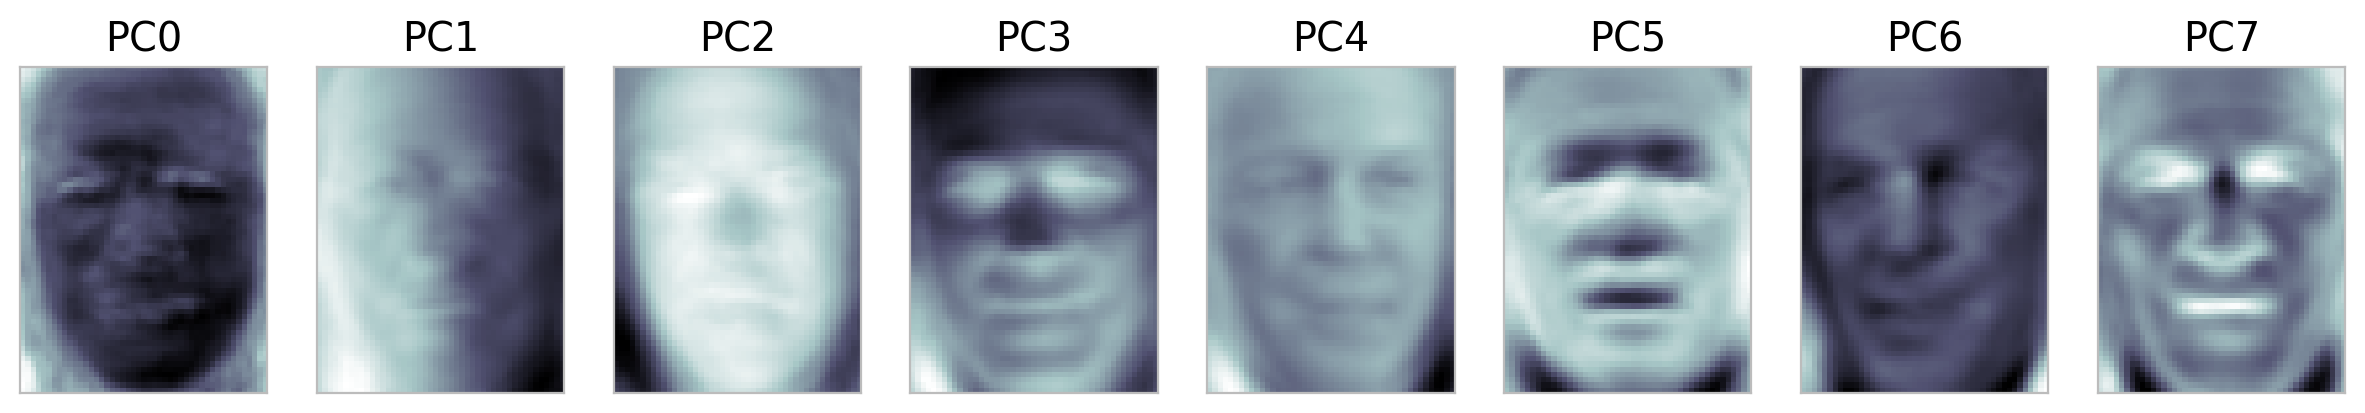

In [56]:
plt.figure(figsize=(15, 5))
for i in range(8):
    plt.subplot(1, 8, i+1)
    plt.imshow(model.components_[i,:].reshape(62,47), cmap='bone')
    plt.xticks([])
    plt.yticks([])
    plt.title(f'PC{i}')

How much of the variance in the face images does the first 150 PCs explain?

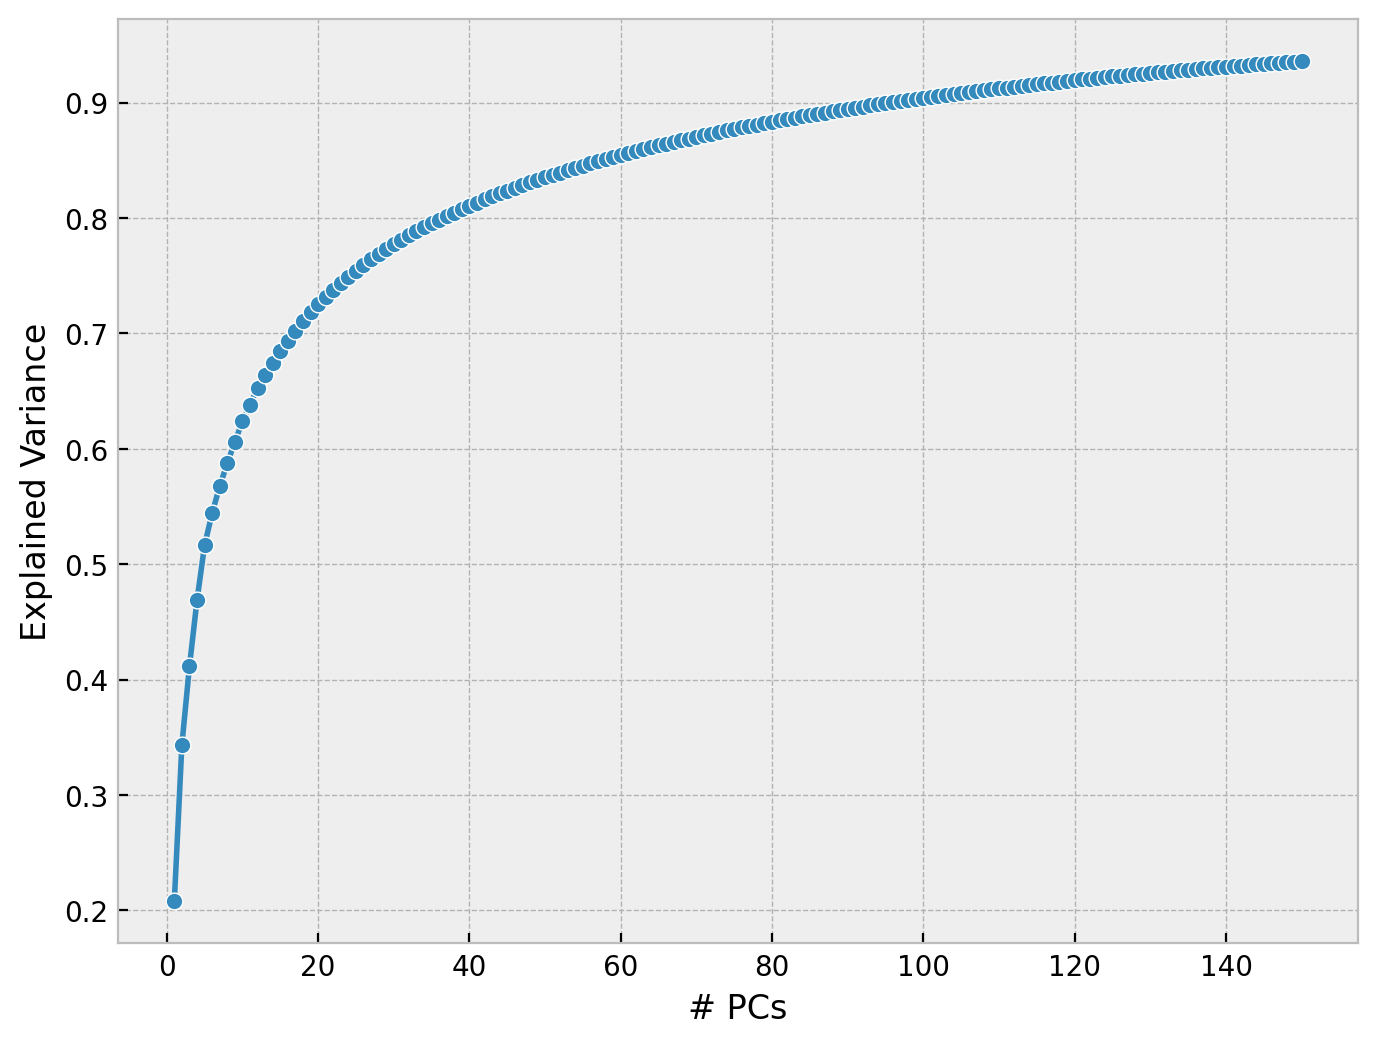

In [57]:
n = np.arange(1, 151)
plt.plot(n, np.cumsum(model.explained_variance_ratio_), 'o-')
plt.xlabel('# PCs')
plt.ylabel('Explained Variance');

What do the reduced dimension images look like?

In [58]:
faces_pc = model.transform(faces)
faces_projected = model.inverse_transform(faces_pc)

print(faces.shape)
print(faces_pc.shape)
print(faces_projected.shape)

(1348, 2914)
(1348, 150)
(1348, 2914)


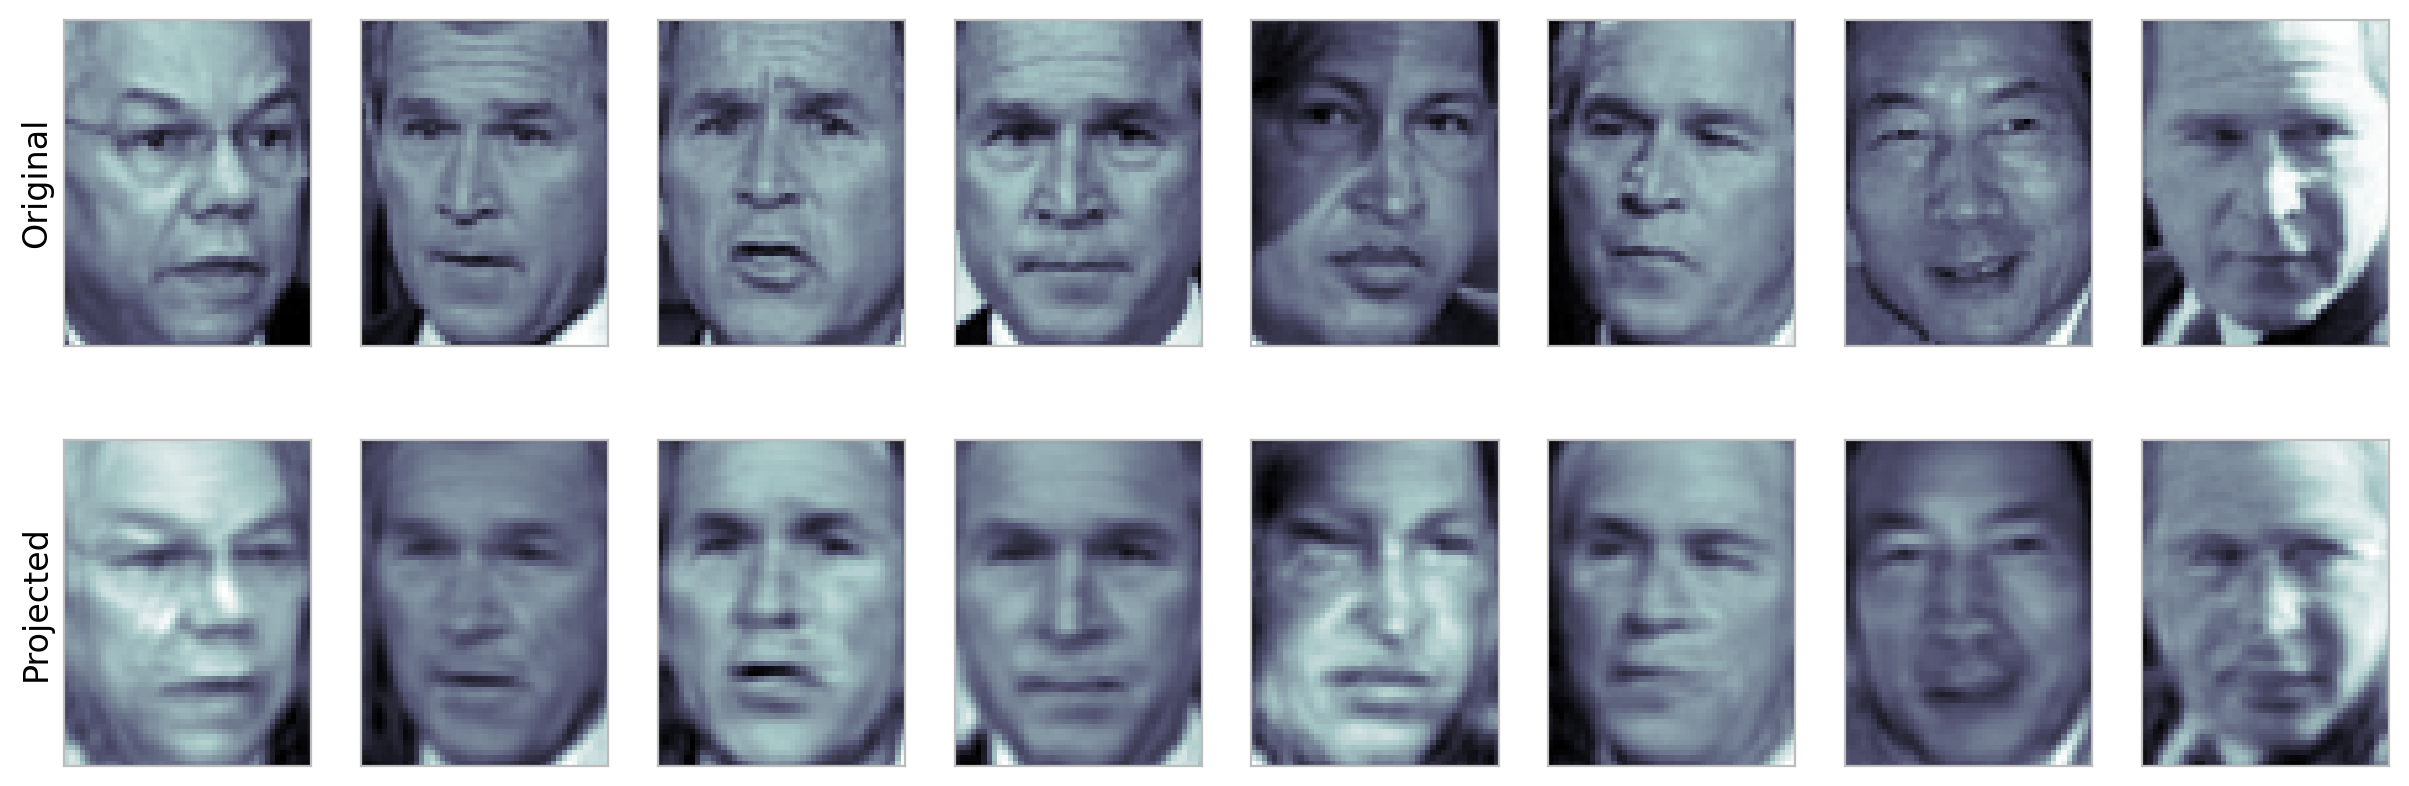

In [59]:
fig, ax = plt.subplots(2, 8, figsize=(15, 5))
for i in range(8):
    # original face
    ax[0,i].imshow(faces[i,:].reshape(62, 47), cmap='bone')
    ax[0,i].set_xticks([])
    ax[0,i].set_yticks([])
    if i == 0:
        ax[0,i].set_ylabel('Original')
    # projected face
    ax[1,i].imshow(faces_projected[i,:].reshape(62, 47), cmap='bone')
    ax[1,i].set_xticks([])
    ax[1,i].set_yticks([])
    if i == 0:
        ax[1,i].set_ylabel('Projected')

### Learning goals - *PCA for images*
|  |  |  |
|--|--|--|
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will understand how images can be represented as points in a high dimensional space.</div> | |
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will be able to apply PCA to images.</div> | |
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will see how PCA can be used as a filter to remove noise.</div> | |